(tutorial-mokken-notebook)=
# Tutorial

In questo notebook esamineremo il tutorial proposto da {cite:t}`sijtsma2017tutorial`, i quali usano un campione (N = 541; 68 donne e 473 uomini) con un'età compresa tra i 23 e gli 89 anni (M = 58.7). I partecipanti erano pazienti affetti da lieve malattia coronarica, a cui è stata somministrata una batteria di questionari, tra cui il DS14, un questionario di 14 item che misura la personalità di Tipo D (Denollet, 2005). Sette item misurano l'affettività negativa (NA) e gli altri sette item misurano l'inibizione sociale (SI). 

La somma dei punteggi dei 14 item, denominata punteggio DS14, misura la personalità di Tipo D. Gli item consistono in un'affermazione seguita da una scala di valutazione a cinque punti, da 0 a 4.

1. I make contact easily when I meet people
2. I often make a fuss about unimportant things
3. I often talk to strangers
4. I often feel unhappy
5. I am often irritated
6. I often feel inhibited in social interactions
7. I take a gloomy view of things
8. I find it hard to start a conversation
9. I am often in a bad mood
10. I am a closed kind of person
11. I would rather keep other people at a distance
12. I often find myself worrying about something
13. I am often down in the dumps
14. When socializing, I don’t find the right things to talk about

In [1]:
suppressPackageStartupMessages({
    library("mokken")
    library("tidyverse")
    library("mice")
})

In [2]:
data(DS14)

In [3]:
# Define Male, Age, and item scores,
male <- DS14[, "Male"]
age <- DS14[, "Age"]
itemScores <- DS14[, 3:16] |> as.data.frame()

In [4]:
# Define
# N = sample size,
# J = number of items
# m = highest item score,
# Na = items in Na scale
# Si = items in Si scale
N <- nrow(itemScores)
J <- ncol(itemScores)
m <- 4
Na <- c(2, 4, 5, 7, 9, 12, 13)
Si <- c(1, 3, 6, 8, 10, 11, 14)

## Dieci passi per l'analisi di una scala Mokken

Descriviamo le tre fasi contenenti dieci passi per eseguire un'analisi di scala Mokken (MSA):

**i. Esame dei dati.** Analizzare i dati e adottare misure appropriate quando si verificano particolari problemi con i dati (passi 1–3).

In [5]:
itemsScores <- as.data.frame(itemScores)
colnames(itemsScores) <- c(
    'Si1','Na2','Si3','Na4','Na5','Si6','Na7','Si8','Na9','Si10','Si11','Na12','Na13','Si14'
)

head(itemsScores)

,Si1,Na2,Si3,Na4,Na5,Si6,Na7,Si8,Na9,Si10,Si11,Na12,Na13,Si14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,2,2,2,2,3,3,2,2,2,4,2,4
2,2,0,3,0,0,2,0,2,0,2,4,3,0,2
3,1,3,1,1,1,2,2,2,2,2,2,1,1,1
4,2,3,2,0,0,1,0,2,1,3,1,1,0,1
5,2,2,1,2,2,2,3,3,2,3,2,3,1,3
6,4,3,4,1,2,0,1,0,2,0,0,4,2,0


## Step 1

1. **Ricodifica.** Ricodificare i punteggi degli item che sono formulati negativamente rispetto all'attributo di interesse, in modo che per tutti gli item punteggi più alti indichino una posizione più elevata sulla scala dell'attributo.

In [6]:
itemsScores$Si1 <- 4 - itemsScores$Si1 
itemsScores$Si3 <- 4 - itemsScores$Si3

In [7]:
head(itemsScores)

,Si1,Na2,Si3,Na4,Na5,Si6,Na7,Si8,Na9,Si10,Si11,Na12,Na13,Si14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,3,2,2,2,2,3,3,2,2,2,4,2,4
2,2,0,1,0,0,2,0,2,0,2,4,3,0,2
3,3,3,3,1,1,2,2,2,2,2,2,1,1,1
4,2,3,2,0,0,1,0,2,1,3,1,1,0,1
5,2,2,3,2,2,2,3,3,2,3,2,3,1,3
6,0,3,0,1,2,0,1,0,2,0,0,4,2,0


## Step 2

2. **Punteggi inammissibili e dati mancanti.** Trattare i punteggi inammissibili come valori mancanti. Determinare la percentuale totale di punteggi mancanti nel set di dati e i rispondenti che hanno lasciato un numero irragionevole di risposte incomplete. Impostare i punteggi degli item mancanti utilizzando un qualche procedura di imputazione. 

In [8]:
# STEP 2: INADMISSIBLE SCORES AND MISSING DATA
# No inadmissible scores
summary(male)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8743  1.0000  1.0000 

In [9]:
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.00   51.00   59.00   58.67   66.00   89.00 

In [10]:
summary(itemsScores)

      Si1            Na2             Si3             Na4        
 Min.   :0.00   Min.   :0.000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.00   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.0000  
 Median :1.00   Median :2.000   Median :2.000   Median :0.0000  
 Mean   :1.28   Mean   :1.871   Mean   :1.809   Mean   :0.8965  
 3rd Qu.:2.00   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:2.0000  
 Max.   :4.00   Max.   :4.000   Max.   :4.000   Max.   :4.0000  
 NA's   :1      NA's   :5       NA's   :1                       
      Na5             Si6             Na7             Si8            Na9       
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.00   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.00   1st Qu.:0.000  
 Median :2.000   Median :1.000   Median :0.000   Median :1.00   Median :1.000  
 Mean   :1.671   Mean   :1.213   Mean   :0.963   Mean   :1.27   Mean   :0.939  
 3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.00   3rd Qu.:2.000  


Eseguiamo l'imputazione multipla.

In [11]:
# Deterministic regression imputation
imp <- mice(itemsScores, method = "norm.predict", m = 1) # Impute data


 iter imp variable
  1   1  Si1  Na2  Si3  Si8  Si10  Si11
  2   1  Si1  Na2  Si3  Si8  Si10  Si11
  3   1  Si1  Na2  Si3  Si8  Si10  Si11
  4   1  Si1  Na2  Si3  Si8  Si10  Si11
  5   1  Si1  Na2  Si3  Si8  Si10  Si11


In [12]:
itemsScores <- complete(imp)

Trasformare i dati in numeri interi.

In [13]:
itemsScores[] <- lapply(itemsScores, function(x) {
    if (is.numeric(x)) as.integer(round(x)) else x
})

In [14]:
summary(itemsScores)

      Si1             Na2             Si3             Na4        
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.0000  
 Median :1.000   Median :2.000   Median :2.000   Median :0.0000  
 Mean   :1.285   Mean   :1.867   Mean   :1.811   Mean   :0.8965  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:2.0000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.0000  
      Na5             Si6             Na7             Si8       
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :2.000   Median :1.000   Median :0.000   Median :1.000  
 Mean   :1.671   Mean   :1.213   Mean   :0.963   Mean   :1.272  
 3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
      Na9             Si10            Si11            Na12      
 Min.   :0.000   M

## Step 3

3. **Outlier.** Identificare se particolari schemi di punteggi degli item si qualificano come outlier.

In [15]:
# STEP 3: OUTLIERS
# Outlier score G+ and two criterion values g1 and g2
outliers <- check.errors(itemsScores)
gPlus <- outliers$Gplus
g1 <- outliers$UGplus$U1Gplus
g2 <- outliers$UGplus$U2Gplus

# Number of outliers
nOutliers <- sum(gPlus > g1)
nOutliers
round(nOutliers * 100 / N, 1)

[1] 30

[1] 5.5

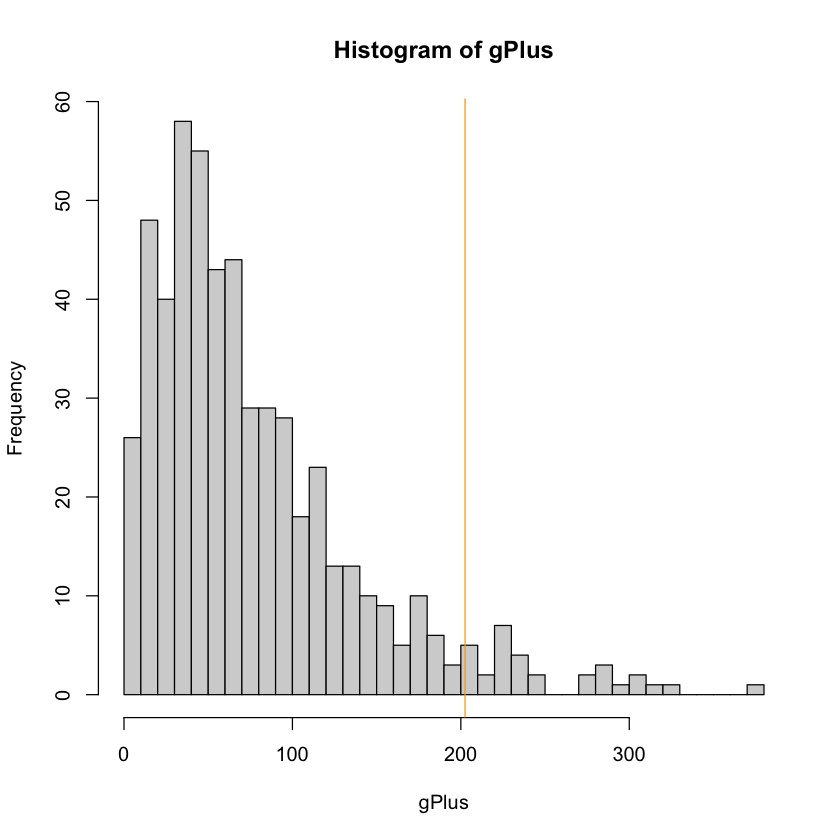

In [16]:
hist(gPlus, breaks = 50)
abline(v = g1, col = "orange")
abline(v = g2, col = "red")

In [99]:
# Correlation of G+ with X+, X+ ()
xPlus <- rowSums(itemsScores)
xPlusNa <- rowSums(itemsScores[, Na])
xPlusSi <- rowSums(itemsScores[, Si])
cor(cbind(gPlus, xPlus, xPlusNa, xPlusSi))

,gPlus,xPlus,xPlusNa,xPlusSi
gPlus,1.0000000,0.2826675,0.3224755,0.1416448
xPlus,0.2826675,1.0000000,0.8194633,0.8211281
xPlusNa,0.3224755,0.8194633,1.0000000,0.3457729
xPlusSi,0.1416448,0.8211281,0.3457729,1.0000000


**ii. Identificazione della scala.** Identificare una o più scale che soddisfino il modello di omogeneità monotona e, se ritenuto appropriato, verificare se le scale soddisfano anche il modello più esigente di monotonia doppia (passi 4–7).

## Step 4

4. **Scalabilità.** Calcolare i coefficienti Hjk, Hj e H per le scale complete. Se ritenuto appropriato, controlliamo se le scale soddisfano anche il modello più esigente di doppia monotonicità.

L'inclusione degli outlier ha mostrato un impatto minimo sulla scalabilità dei risultati; pertanto, tali osservazioni sono state mantenute nell'analisi. 

In [17]:
# Scalability coefficients
coefH(itemsScores[, Na])

$Hij
     Na2     se      Na4     se      Na5     se      Na7     se      Na9    
Na2                   0.391  (0.048)  0.522  (0.039)  0.465  (0.045)  0.468 
Na4   0.391  (0.048)                  0.439  (0.047)  0.661  (0.039)  0.503 
Na5   0.522  (0.039)  0.439  (0.047)                  0.499  (0.040)  0.581 
Na7   0.465  (0.045)  0.661  (0.039)  0.499  (0.040)                  0.555 
Na9   0.468  (0.045)  0.503  (0.045)  0.581  (0.038)  0.555  (0.043)        
Na12  0.532  (0.035)  0.616  (0.040)  0.475  (0.040)  0.648  (0.036)  0.440 
Na13  0.493  (0.040)  0.725  (0.033)  0.508  (0.042)  0.722  (0.031)  0.548 
     se      Na12    se      Na13    se     
Na2  (0.045)  0.532  (0.035)  0.493  (0.040)
Na4  (0.045)  0.616  (0.040)  0.725  (0.033)
Na5  (0.038)  0.475  (0.040)  0.508  (0.042)
Na7  (0.043)  0.648  (0.036)  0.722  (0.031)
Na9           0.440  (0.045)  0.548  (0.041)
Na12 (0.045)                  0.685  (0.031)
Na13 (0.041)  0.685  (0.031)                

$Hi
     Item H  s

In [18]:
coefH(itemsScores[, Si])

$Hij
     Si1     se      Si3     se      Si6     se      Si8     se      Si10   
Si1                   0.671  (0.036)  0.515  (0.043)  0.566  (0.040)  0.588 
Si3   0.671  (0.036)                  0.277  (0.049)  0.469  (0.044)  0.468 
Si6   0.515  (0.043)  0.277  (0.049)                  0.595  (0.039)  0.551 
Si8   0.566  (0.040)  0.469  (0.044)  0.595  (0.039)                  0.611 
Si10  0.588  (0.039)  0.468  (0.042)  0.551  (0.040)  0.611  (0.034)        
Si11  0.543  (0.040)  0.403  (0.044)  0.493  (0.043)  0.516  (0.041)  0.554 
Si14  0.506  (0.041)  0.410  (0.044)  0.526  (0.040)  0.680  (0.033)  0.523 
     se      Si11    se      Si14    se     
Si1  (0.039)  0.543  (0.040)  0.506  (0.041)
Si3  (0.042)  0.403  (0.044)  0.410  (0.044)
Si6  (0.040)  0.493  (0.043)  0.526  (0.040)
Si8  (0.034)  0.516  (0.041)  0.680  (0.033)
Si10          0.554  (0.038)  0.523  (0.039)
Si11 (0.038)                  0.451  (0.045)
Si14 (0.039)  0.451  (0.045)                

$Hi
     Item H  s

In [19]:
coefH(itemsScores)

$Hij
     Si1     se      Na2      se      Si3      se      Na4     se      Na5     
Si1                    0.050  (0.049)   0.671  (0.036)  0.219  (0.051)   0.092 
Na2   0.050  (0.049)                   -0.062  (0.047)  0.391  (0.048)   0.522 
Si3   0.671  (0.036)  -0.062  (0.047)                   0.097  (0.053)  -0.059 
Na4   0.219  (0.051)   0.391  (0.048)   0.097  (0.053)                   0.439 
Na5   0.092  (0.049)   0.522  (0.039)  -0.059  (0.046)  0.439  (0.047)         
Si6   0.515  (0.043)   0.270  (0.048)   0.277  (0.049)  0.450  (0.044)   0.368 
Na7   0.211  (0.050)   0.465  (0.045)   0.114  (0.049)  0.661  (0.039)   0.499 
Si8   0.566  (0.040)   0.176  (0.048)   0.469  (0.044)  0.318  (0.048)   0.165 
Na9   0.112  (0.050)   0.468  (0.045)   0.033  (0.050)  0.503  (0.045)   0.581 
Si10  0.588  (0.039)   0.156  (0.048)   0.468  (0.042)  0.242  (0.048)   0.172 
Si11  0.543  (0.040)   0.129  (0.050)   0.403  (0.044)  0.225  (0.051)   0.188 
Na12  0.172  (0.048)   0.532  (0.03

Riguardo agli item NA, per coppie di item con una scalabilità di .41 < Hjk < .73 (con un errore standard, SE, compreso tra .03 e .05) e per singoli item con .49 < Hj < .62 (.02 < SE < .03), è stata evidenziata una forte coerenza nella scala (H = .55, SE = .02). 

Per gli item SI, le coppie mostrano una scalabilità di .40 < Hjk < .67 (.03 < SE < .05), mentre i singoli item si attestano tra .45 < Hj < .57 (.02 < SE < .03). 

La scala complessiva per gli item SI registra un H = .52 (SE = .02); tuttavia, l'ampiezza dell'errore standard impedisce di affermare con certezza che nella popolazione H sia maggiore di .5, suggerendo così una forza media della scala. 

Per quanto riguarda i 14 item del DS14, è stato ottenuto un H = .36 (SE = .02), ma questi non formano una scala Mokken debole, dato che i coefficienti H2,3 e H3,5 risultano negativi, in violazione del criterio per la definizione di scala. Altri coefficienti di scalabilità per coppie di item non hanno mostrato significatività superiore a zero. Tenendo conto degli errori standard, i coefficienti di scalabilità per gli item H2, H5 e H11 superano significativamente il limite inferiore convenzionale di .3.


5. **Indipendenza locale.** Investigare l'indipendenza locale utilizzando la procedura di associazione condizionale (Straat et al., in stampa). La procedura di associazione condizionale coinvolge due indici W1 e W3 che segnalano coppie di item dipendenti localmente.

In [104]:
# STEP 5: LOCAL INDEPENDENCE
# Results from CA procedure
check.ca(itemsScores[, Na], TRUE)

$InScale
$InScale[[1]]
[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE


$Index
$Index[[1]]
$Index[[1]]$W1
           Na2       Na4       Na5      Na7       Na9      Na12     Na13
Na2         NA 0.6179697 1.2066679 1.379887 1.0918364 3.5995994 2.164015
Na4  0.4210748        NA 0.8414810 1.753125 1.0550188 2.6399419 3.698480
Na5  0.5506875 0.8513984        NA 1.883061 1.6898703 1.1305348 2.105468
Na7  0.1219797 0.5447578 0.2169763       NA 0.7527397 1.6090471 1.404433
Na9  0.7567135 0.9076606 1.1558442 1.629162        NA 0.2244819 1.904042
Na12 0.8473397 0.6294961 0.2911338 1.861060 0.8821990        NA 2.135409
Na13 0.1200216 0.3472191 0.2334970 1.101058 0.3292302 1.9645768       NA

$Index[[1]]$W2
         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]
[1,] 46.05904 39.59751 43.65944 36.36045 44.05644 36.08189 39.60723

$Index[[1]]$W3
           Na2       Na4       Na5       Na7       Na9      Na12      Na13
Na2         NA 12.289372  3.243247 10.058823  6.395469  3.918299 10.153830
Na4  12.289372        NA  9.886621  3.011686  7.617531  4.007542  2.784763
Na5   3.243247  9.886621        NA  9.606688  2.424949  6.988068 11.509870
Na7  10.058823  3.011686  9.606688        NA  6.554529  4.415711  2.713013
Na9   6.395469  7.617531  2.424949  6.554529        NA 12.685237  8.378724
Na12  3.918299  4.007542  6.988068  4.415711 12.685237        NA  4.067033
Na13 10.153830  2.784763 11.509870  2.713013  8.378724  4.067033        NA



$Flagged
$Flagged[[1]]
$Flagged[[1]]$F1
     Na2 Na4 Na5 Na7 Na9 Na12 Na13
Na2    0   0   0   0   0    0    0
Na4    0   0   0   0   0    0    0
Na5    0   0   0   0   0    0    0
Na7    0   0   0   0   0    0    0
Na9    0   0   0   0   0    0    0
Na12   0   0   0   0   0    0    0
Na13   0   0   0   0   0    0    0

$Flagged[[1]]$F2
     [,1] [,2] [,3] [,4] [,5] [,6] [,7]
[1,]    0    0    0    0    0    0    0

$Flagged[[1]]$F3
     Na2 Na4 Na5 Na7 Na9 Na12 Na13
Na2    0   0   0   0   0    0    0
Na4    0   0   0   0   0    0    0
Na5    0   0   0   0   0    0    0
Na7    0   0   0   0   0    0    0
Na9    0   0   0   0   0    0    0
Na12   0   0   0   0   0    0    0
Na13   0   0   0   0   0    0    0

In [105]:
check.ca(itemsScores[, Si], TRUE)

$InScale
$InScale[[1]]
[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

$InScale[[2]]
[1]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

$InScale[[3]]
[1]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE


$Index
$Index[[1]]
$Index[[1]]$W1
           Si1        Si3        Si6       Si8      Si10       Si11      Si14
Si1         NA 0.61080275 0.13233200 0.3864878 0.3214138 0.39027350 0.2545415
Si3  7.4940537         NA 0.14788369 3.3404313 2.2940595 1.62689279 1.9854466
Si6  3.2383893 0.02665348         NA 3.0148224 3.0785904 1.69901340 2.0204872
Si8  0.8887082 0.14169155 0.07253119        NA 0.3775119 0.09634922 0.4288780
Si10 1.5960351 0.08681354 0.13281054 0.8860611        NA 0.83018918 0.2547350
Si11 1.6889198 0.27593365 0.27492005 0.8375871 1.0178655         NA 0.1092758
Si14 1.5630712 0.16251226 0.53781990 2.5512166 1.3677266 0.16834674        NA

$Index[[1]]$W2
         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]
[1,] 39.50309 45.65888 45.38552 34.33251 37.19939 42.15621 40.21989

$Index[[1]]$W3
          Si1       Si3       Si6      Si8     Si10     Si11     Si14
Si1        NA  1.235175  6.876940 8.953452 6.179279 7.308560 8.949681
Si3  1.235175        NA 14.953617 8.153276 6.268706 6.972669 8.075439
Si6  6.876940 14.953617        NA 3.861704 7.052217 6.761927 5.879112
Si8  8.953452  8.153276  3.861704       NA 5.155177 6.799279 1.409627
Si10 6.179279  6.268706  7.052217 5.155177       NA 5.475873 7.068136
Si11 7.308560  6.972669  6.761927 6.799279 5.475873       NA 8.837899
Si14 8.949681  8.075439  5.879112 1.409627 7.068136 8.837899       NA


$Index[[2]]
$Index[[2]]$W1
            Si1 Si3        Si6       Si8      Si10       Si11       Si14
Si1          NA  NA 0.13233200 0.3864849 0.3214011 0.38246417 0.25232684
Si3          NA  NA         NA        NA        NA         NA         NA
Si6  0.14118765  NA         NA 0.6130808 1.1122510 0.44549143 0.26424484
Si8  0.07884079  NA 0.06649432        NA 0.2590659 0.06108522 0.25906970
Si10 0.33580780  NA 0.12444040 0.7630631        NA 0.61772374 0.21501398
Si11 0.38493217  NA 0.25941331 0.6862065 0.8826178         NA 0.09181554
Si14 0.54030147  NA 0.41984998 1.8869084 1.2937128 0.05051468         NA

$Index[[2]]$W2
         [,1] [,2]     [,3]     [,4]    [,5]     [,6]     [,7]
[1,] 20.21876   NA 24.34267 18.70754 22.2938 25.93124 24.02858

$Index[[2]]$W3
          Si1 Si3      Si6      Si8     Si10     Si11     Si14
Si1        NA  NA 4.917433 4.099943 2.760407 3.594524 4.846455
Si3        NA  NA       NA       NA       NA       NA       NA
Si6  4.917433  NA       NA 3.022826 5.692270 5.835754 4.874390
Si8  4.099943  NA 3.022826       NA 4.364169 6.050361 1.170238
Si10 2.760407  NA 5.692270 4.364169       NA 3.395029 6.081922
Si11 3.594524  NA 5.835754 6.050361 3.395029       NA 7.055575
Si14 4.846455  NA 4.874390 1.170238 6.081922 7.055575       NA


$Index[[3]]
$Index[[3]]$W1
            Si1 Si3        Si6        Si8      Si10       Si11 Si14
Si1          NA  NA 0.04749283 0.10001891 0.2706452 0.36325565   NA
Si3          NA  NA         NA         NA        NA         NA   NA
Si6  0.06539702  NA         NA 0.25563275 0.3206986 0.43438917   NA
Si8  0.07880992  NA 0.06644315         NA 0.2589359 0.06108031   NA
Si10 0.06804149  NA 0.01301436 0.04022932        NA 0.59752476   NA
Si11 0.18821851  NA 0.03587970 0.16604595 0.4313432         NA   NA
Si14         NA  NA         NA         NA        NA         NA   NA

$Index[[3]]$W2
         [,1] [,2]     [,3]     [,4]     [,5]     [,6] [,7]
[1,] 11.14005   NA 13.20044 9.150614 11.47446 12.69603   NA

$Index[[3]]$W3
          Si1 Si3      Si6      Si8     Si10     Si11 Si14
Si1        NA  NA 3.599736 2.185717 2.639904 2.714694   NA
Si3        NA  NA       NA       NA       NA       NA   NA
Si6  3.599736  NA       NA 1.330815 4.817293 3.452590   NA
Si8  2.185717  NA 1.330815       NA 1.561302 4.072780   NA
Si10 2.639904  NA 4.817293 1.561302       NA 2.455961   NA
Si11 2.714694  NA 3.452590 4.072780 2.455961       NA   NA
Si14       NA  

In [106]:
check.ca(itemsScores, TRUE)

,Si1,Na2,Si3,Na4,Na5,Si6,Na7,Si8,Na9,Si10,Si11,Na12,Na13,Si14
Si1,NA,3.7656759,5.3950361,12.763969,5.392215,22.27823,13.89110,18.465576,7.967065,16.551151,13.990934,10.170014,13.621740,15.756574
Na2,9.338788,NA,3.1339634,16.357831,13.147263,17.60705,19.81005,14.050577,15.865210,13.169944,12.459782,21.209560,20.672213,12.380653
Si3,31.467695,8.3767345,NA,16.654163,7.654408,23.64544,18.93421,27.580420,14.432880,27.338030,23.133233,14.694454,17.397528,26.568026
Na4,5.849691,2.0894263,1.9303778,NA,3.342817,13.93560,11.92809,9.399139,5.810212,6.290490,6.446997,8.583626,11.018004,8.642545
Na5,10.014376,9.0500166,2.9697158,16.619004,NA,21.90283,20.61846,11.172094,15.296915,11.746344,13.844898,13.650013,17.805039,11.374531
Si6,5.409296,0.8488675,0.2330259,5.003882,2.895776,NA,6.80852,5.595272,6.359225,3.790967,3.408145,2.813723,7.055205,4.341929
Na7,6.806945,1.4946857,1.4407670,8.238079,1.905501,11.80435,NA,8.795147,3.962045,7.965476,5.593104,8.210832,8.798303,8.797831
Si8,6.859512,2.3198355,1.5996206,9.563978,1.520464,14.96694,11.04066,NA,8.590548,5.904984,5.125885,5.524485,9.223541,7.712751
Na9,7.898193,4.6657959,2.0920162,11.162755,7.147696,17.49868,12.94410,12.835822,NA,9.737938,7.423739,8.347900,11.672639,11.733514
Si10,8.465390,2.2860736,2.4677840,8.180382,3.338846,14.92748,13.27133,12.138669,7.431532,NA,9.332409,7.344684,8.272975,10.098650


Per gli item NA, la procedura di associazione condizionata utilizzando gli indici W1 e W3 non ha evidenziato alcun item problematico. 

Per gli item SI, un elevato indice W1 ha suggerito che gli item formulati negativamente 1 e 3 fossero dipendenti localmente in modo positivo. L'indice W3 ha segnalato la coppia di item (3, 6), suggerendo che questi item potrebbero essere dipendenti localmente in modo negativo. 

In conformità con i passi 3 e 4, questo risultato ha suggerito che l'item 3 potrebbe essere rivisto. Senza l'item 3, l'indice W1 ha indicato le coppie di item (8, 14) e (10, 14) come dipendenti localmente in modo positivo. Per l'intero DS14, gli indici hanno identificato gli item 1 e 3 come dipendenti localmente in modo positivo, e presenti in diverse coppie di item dipendenti localmente in modo negativo con altri item. Senza gli item 1 e 3, i dati rimanenti non mostrano evidenze di dipendenza locale.

## Step 6

6. **Monotonicità.** Investigare la monotonia delle funzioni di risposta agli item (IRF) usando un metodo di regressione non parametrico per un punteggio dell'item sul punteggio totale degli altri J-1 item nella stessa scala (Junker & Sijtsma, 2000; Sijtsma & Molenaar, 2002, 2016). L'analisi grafica fornisce un'indicazione del grado in cui una curva osservata può essere considerata monotona, e le deviazioni locali dalla monotonia possono essere testate per significatività statistica.

In [108]:
# Results from manifest monotonicity
resMonNa <- check.monotonicity(itemsScores[, Na])
resMonSi <- check.monotonicity(itemsScores[, Si])
resMonDs <- check.monotonicity(itemsScores)
summary(resMonNa)

,ItemH,#ac,#vi,#vi/#ac,maxvi,sum,sum/#ac,zmax,#zsig,crit
Na2,0.48,84,0,0.00,0.00,0.00,0.0000,0.00,0,0
Na4,0.56,107,1,0.01,0.04,0.04,0.0004,0.77,0,-1
Na5,0.50,79,1,0.01,0.05,0.05,0.0007,0.95,0,4
Na7,0.59,78,2,0.03,0.07,0.10,0.0013,1.02,0,5
Na9,0.51,86,4,0.05,0.08,0.23,0.0027,1.26,0,17
Na12,0.56,78,0,0.00,0.00,0.00,0.0000,0.00,0,0
Na13,0.62,59,0,0.00,0.00,0.00,0.0000,0.00,0,0


In [109]:
summary(resMonSi)

,ItemH,#ac,#vi,#vi/#ac,maxvi,sum,sum/#ac,zmax,#zsig,crit
Si1,0.57,108,0,0.00,0.00,0.00,0.0000,0.00,0,0
Si3,0.45,112,5,0.04,0.08,0.24,0.0021,0.91,0,18
Si6,0.49,103,8,0.08,0.07,0.45,0.0044,1.76,1,39
Si8,0.57,89,1,0.01,0.04,0.04,0.0005,0.92,0,-1
Si10,0.55,96,0,0.00,0.00,0.00,0.0000,0.00,0,0
Si11,0.49,97,6,0.06,0.09,0.38,0.0040,1.53,0,26
Si14,0.52,89,3,0.03,0.04,0.10,0.0012,1.13,0,8


In [110]:
summary(resMonDs)

,ItemH,#ac,#vi,#vi/#ac,maxvi,sum,sum/#ac,zmax,#zsig,crit
Si1,0.35,95,0,0.00,0.00,0.00,0.0000,0.00,0,0
Na2,0.28,144,6,0.04,0.14,0.48,0.0034,1.97,1,52
Si3,0.22,112,6,0.05,0.07,0.29,0.0026,1.16,0,32
Na4,0.40,96,1,0.01,0.09,0.09,0.0009,0.91,0,13
Na5,0.31,112,3,0.03,0.05,0.13,0.0012,0.92,0,18
Si6,0.44,118,6,0.05,0.04,0.25,0.0021,1.00,0,17
Na7,0.43,95,11,0.12,0.07,0.41,0.0043,1.51,0,33
Si8,0.41,91,5,0.05,0.08,0.22,0.0024,1.06,0,22
Na9,0.35,83,5,0.06,0.05,0.25,0.0031,1.40,0,26
Si10,0.37,129,3,0.02,0.10,0.19,0.0014,0.96,0,21


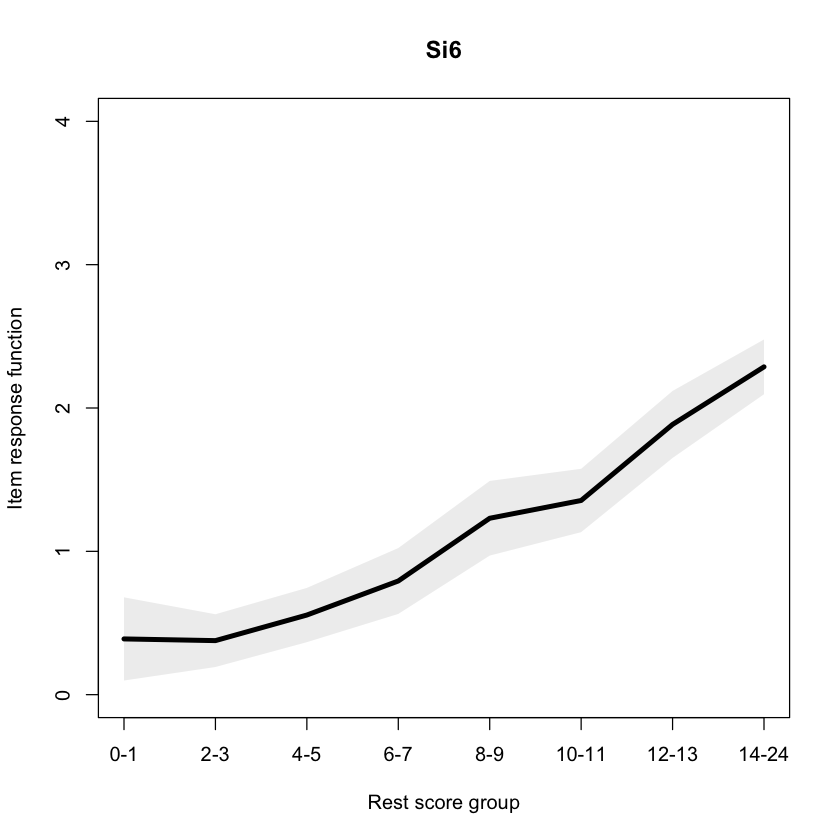

In [111]:
plot(resMonSi, items = 3, curve = "IRF")

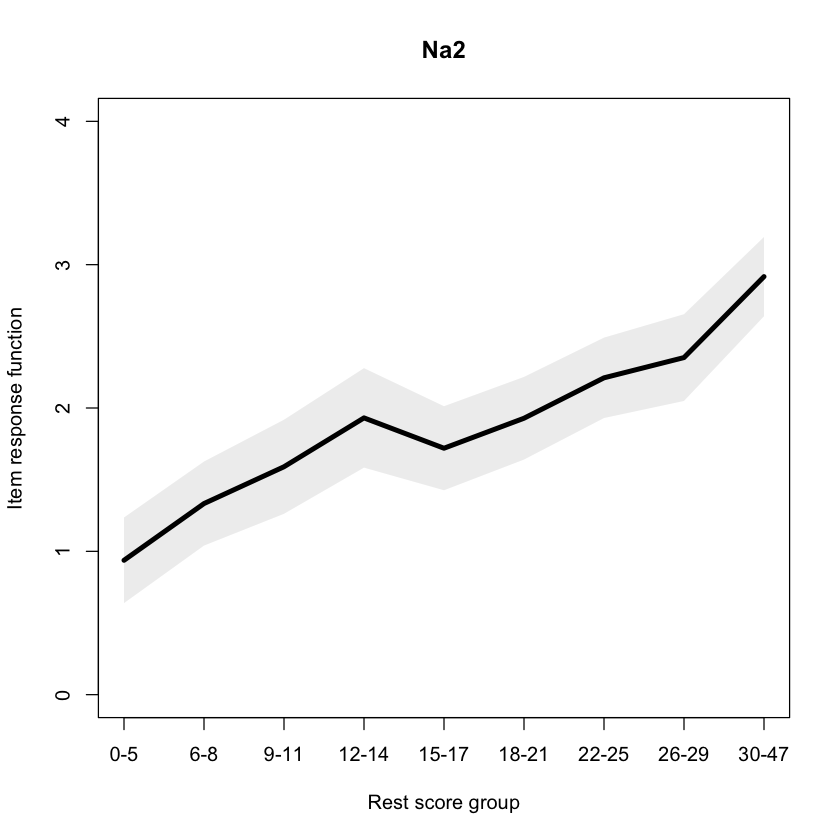

In [112]:
plot(resMonDs, items = 2, curve = "IRF")

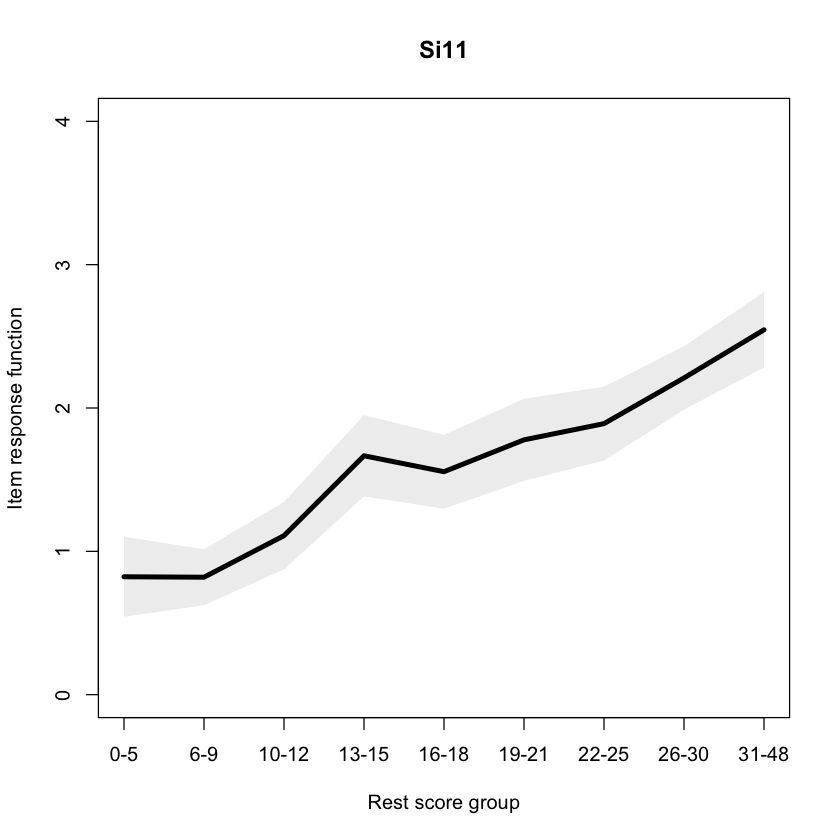

In [113]:
plot(resMonDs, items = 11, curve = "IRF")

Nel caso di NA, l'analisi dei dati ha supportato la monotonia manifesta. Per quanto riguarda SI, un ISRF dell'elemento 6 ha mostrato una significativa diminuzione, ma l'item response function (IRF) risultante non è stato influenzato. Per l'intero DS14, i ISRF degli item 2 e 11 hanno mostrato una significativa diminuzione, ma l'effetto sull'IRF è stato minimo.

## Step 7

7. **Ordinamento invariante degli item.** L'IIO sostiene che l'ordine degli item, basato sulla difficoltà o sulla probabilità di una risposta positiva, dovrebbe rimanere costante indipendentemente dal gruppo di soggetti considerato. Ciò significa che, se un item è generalmente più difficile di un altro in un sottogruppo di soggetti, dovrebbe rimanere più difficile in tutti i sottogruppi. 

Per NA, SI e gli item DS14, l'ispezione visiva ha suggerito che diverse IRF fossero quasi identiche, rendendo quindi difficile stabilire un ordinamento degli item invariante. Il metodo più rigoroso per indagare sull'ordinamento degli item invariante (chiamato aumento in trasposizione; Ligtvoet, Van der Ark, Bergsma e Sijtsma, 2011) ha suggerito che solo quattro dei 14 item (NA: 4, 13; SI: 10, 14) non mostrano segni di violazione dell'ordinamento degli item invariante. 

In [114]:
# Results from manifest IIO
resIioNa <- check.iio(itemsScores[, Na])
resIioSi <- check.iio(itemsScores[, Si])
resIioDs <- check.iio(itemsScores)
summary(resIioNa)

$method
[1] "MIIO"

$item.summary
     ItemH #ac #vi #vi/#ac maxvi  sum sum/#ac tmax #tsig crit
Na2   0.48  36   2    0.06  0.24 0.46  0.0128 1.95     2   70
Na12  0.56  35   3    0.09  0.24 0.59  0.0168 1.95     2   74
Na5   0.50  36   1    0.03  0.13 0.13  0.0036 0.75     0   17
Na7   0.59  36   4    0.11  0.16 0.60  0.0167 2.53     2   71
Na9   0.52  36   5    0.14  0.36 1.11  0.0309 3.13     3  124
Na4   0.56  36   3    0.08  0.28 0.58  0.0162 2.36     3   86
Na13  0.62  35   2    0.06  0.36 0.54  0.0154 3.13     2   85

$backward.selection
     step 1 step 2 step 3 step 4
Na2       1      1      1     NA
Na12      1      1      1      0
Na5       0      0      0      0
Na7       2      1      0      0
Na9       3     NA     NA     NA
Na4       3      2     NA     NA
Na13      2      1      0      0

$HT
[1] 0.4384726

In [115]:
summary(resIioSi)

$method
[1] "MIIO"

$item.summary
     ItemH #ac #vi #vi/#ac maxvi  sum sum/#ac tmax #tsig crit
Si3   0.45  37   0    0.00  0.00 0.00  0.0000 0.00     0    0
Si11  0.49  36   2    0.06  0.32 0.49  0.0136 2.95     2   84
Si10  0.55  37   2    0.05  0.32 0.46  0.0124 2.95     1   72
Si1   0.57  38   2    0.05  0.24 0.40  0.0106 1.61     0   42
Si8   0.57  37   4    0.11  0.26 0.73  0.0196 1.76     1   74
Si6   0.49  36   3    0.08  0.26 0.64  0.0178 1.61     0   60
Si14  0.52  37   1    0.03  0.13 0.13  0.0036 1.12     0   18

$backward.selection
     step 1 step 2
Si3       0      0
Si11      2     NA
Si10      1      0
Si1       0      0
Si8       1      0
Si6       0      0
Si14      0      0

$HT
[1] 0.1210364

In [116]:
summary(resIioDs)

,ItemH,#ac,#vi,#vi/#ac,maxvi,sum,sum/#ac,tmax,#tsig,crit
Na2,0.28,93,4,0.04,0.35,1.06,0.0114,2.25,1,86
Na12,0.37,94,7,0.07,0.58,2.05,0.0218,2.89,3,135
Si3,0.22,96,7,0.07,0.58,2.05,0.0214,2.89,2,137
Na5,0.31,93,5,0.05,0.25,1.08,0.0116,1.14,0,60
Si11,0.34,96,4,0.04,0.24,0.79,0.0082,1.61,0,53
Si10,0.37,91,2,0.02,0.23,0.36,0.0040,1.61,0,40
Si1,0.35,95,5,0.05,0.39,1.27,0.0133,2.93,2,99
Si8,0.41,94,4,0.04,0.29,0.87,0.0093,2.23,2,75
Si6,0.44,96,8,0.08,0.39,1.71,0.0178,2.93,2,105
Si14,0.38,93,6,0.06,0.30,1.19,0.0128,2.25,2,85


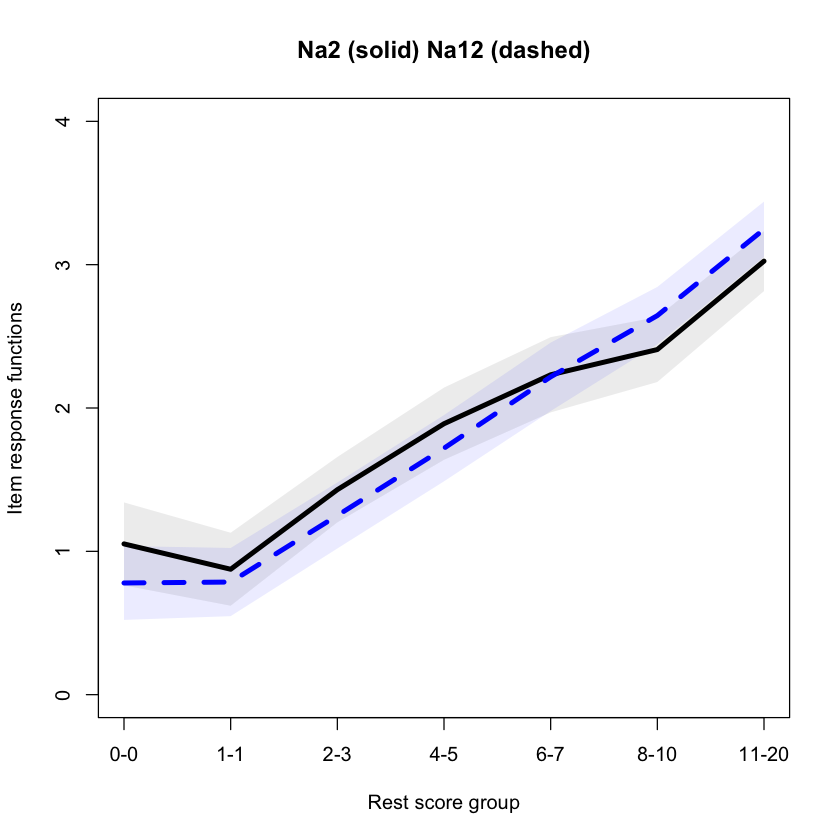

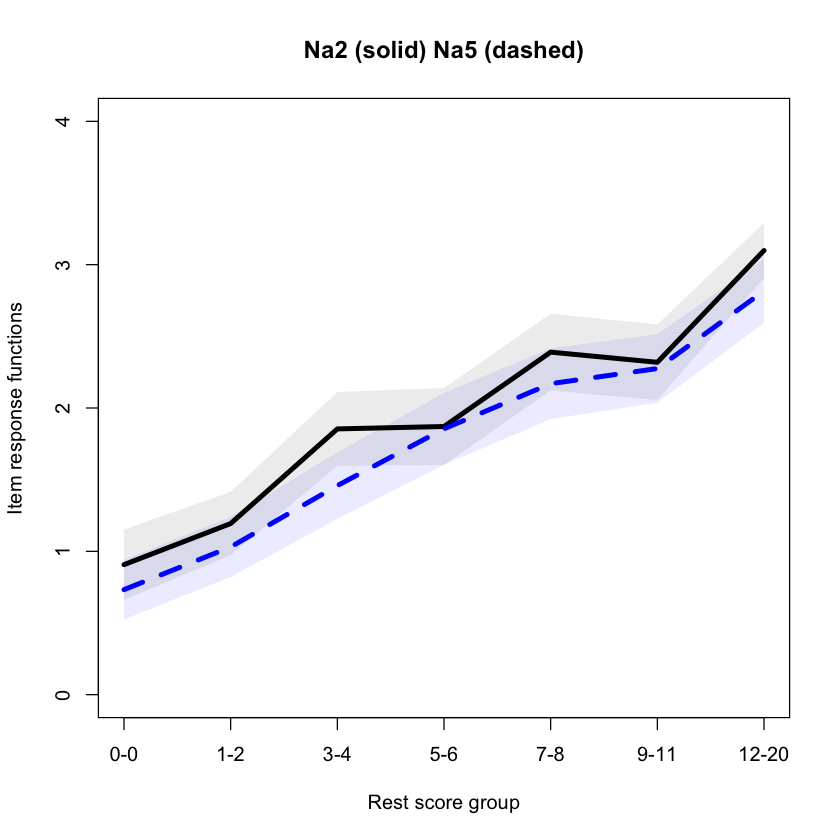

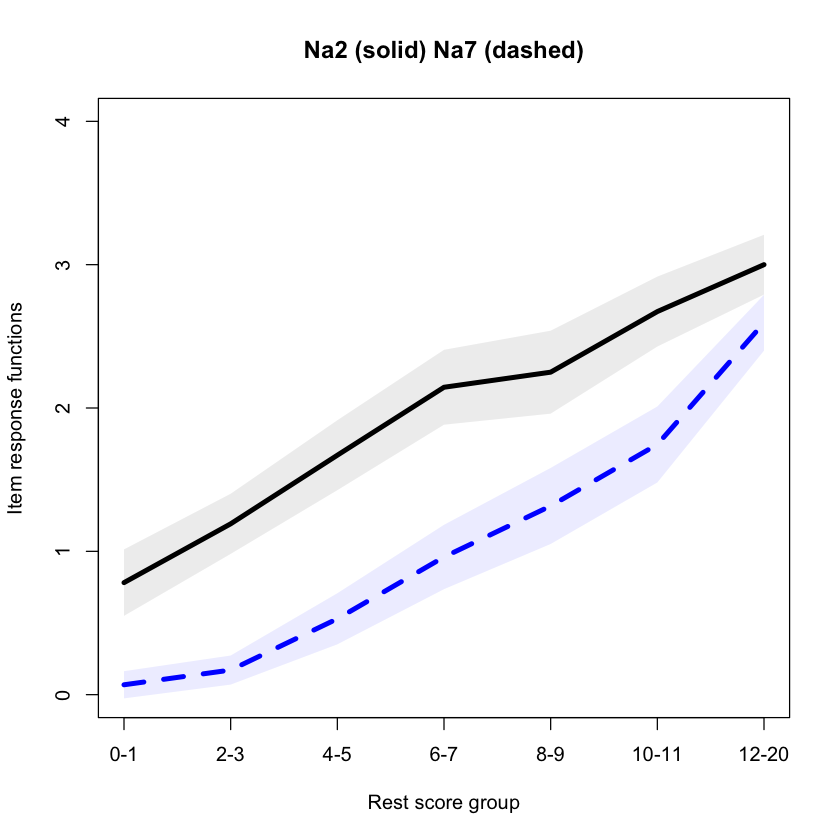

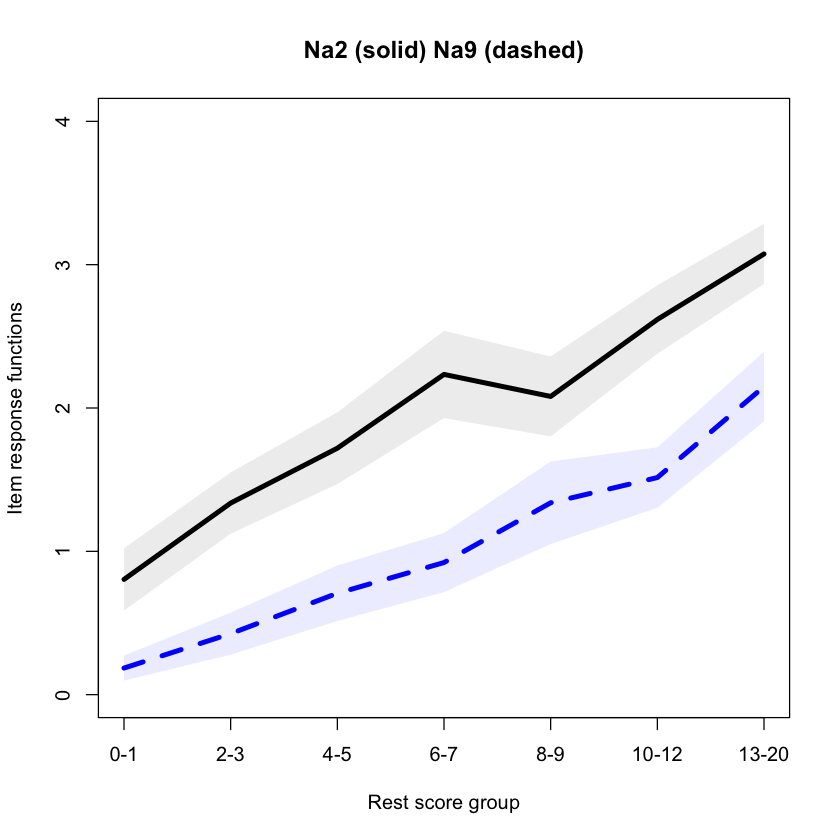

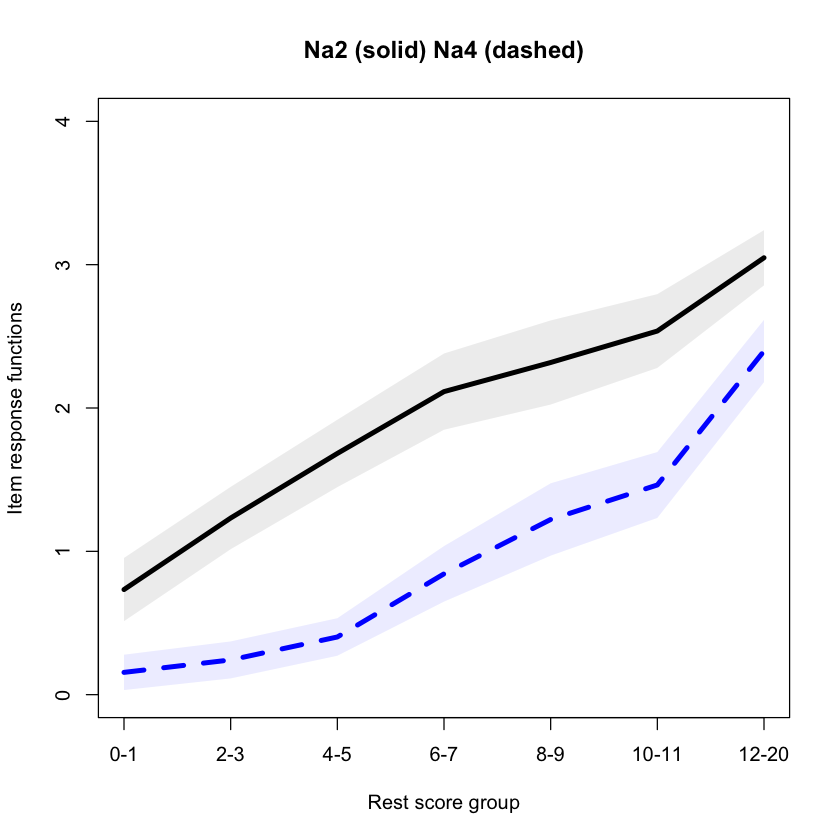

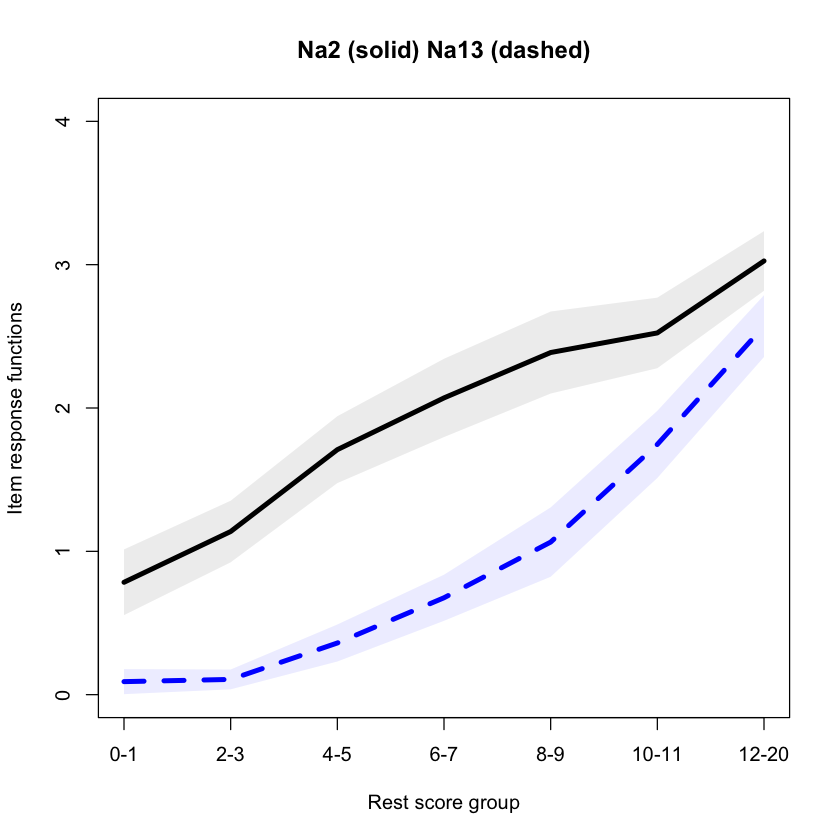

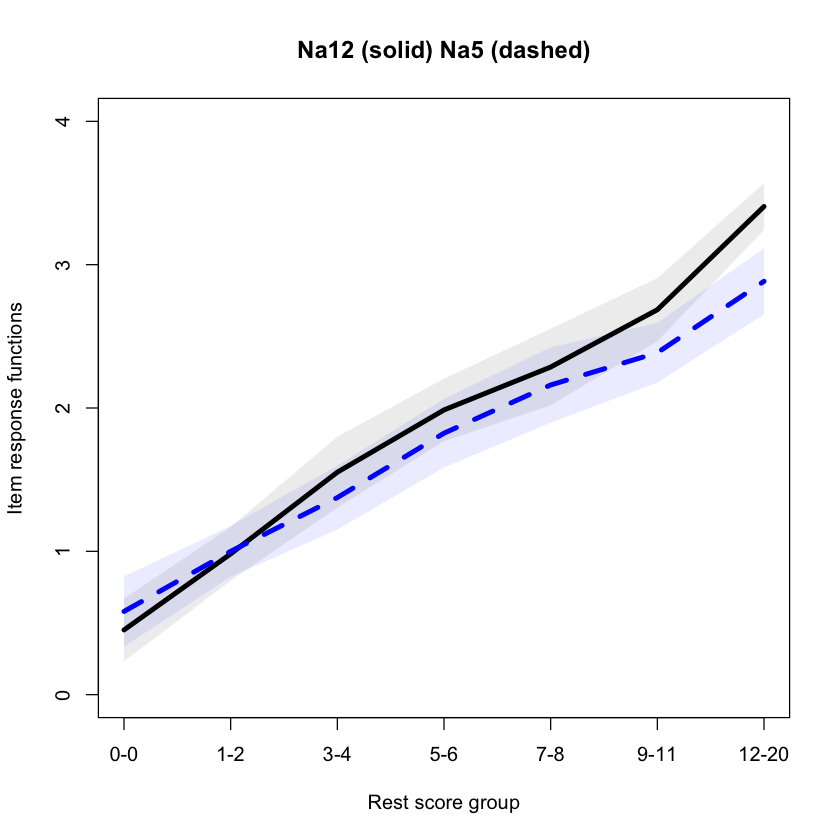

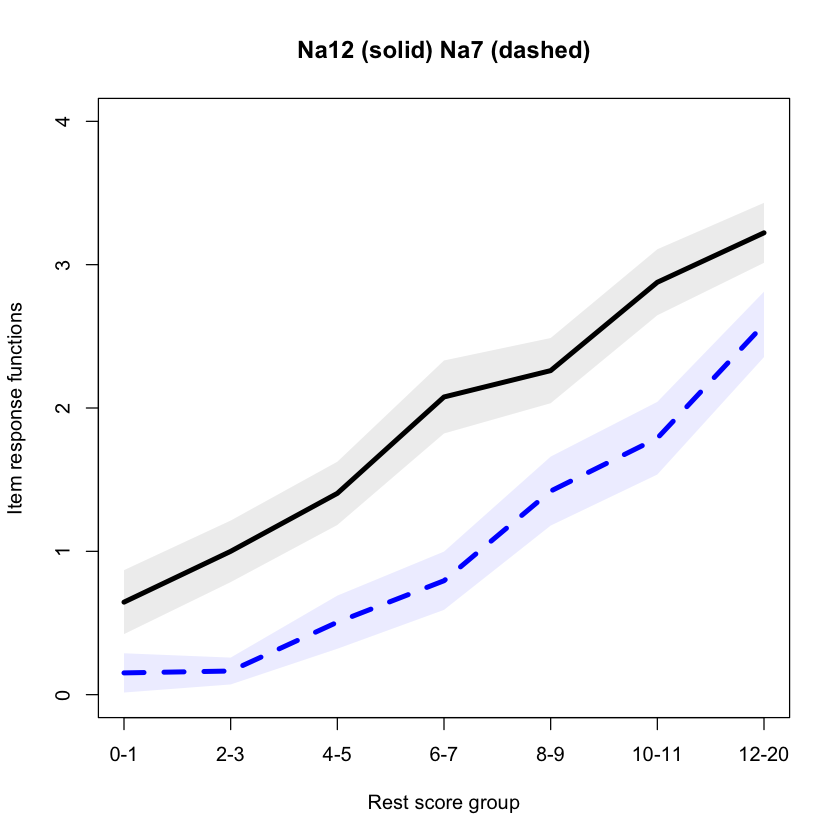

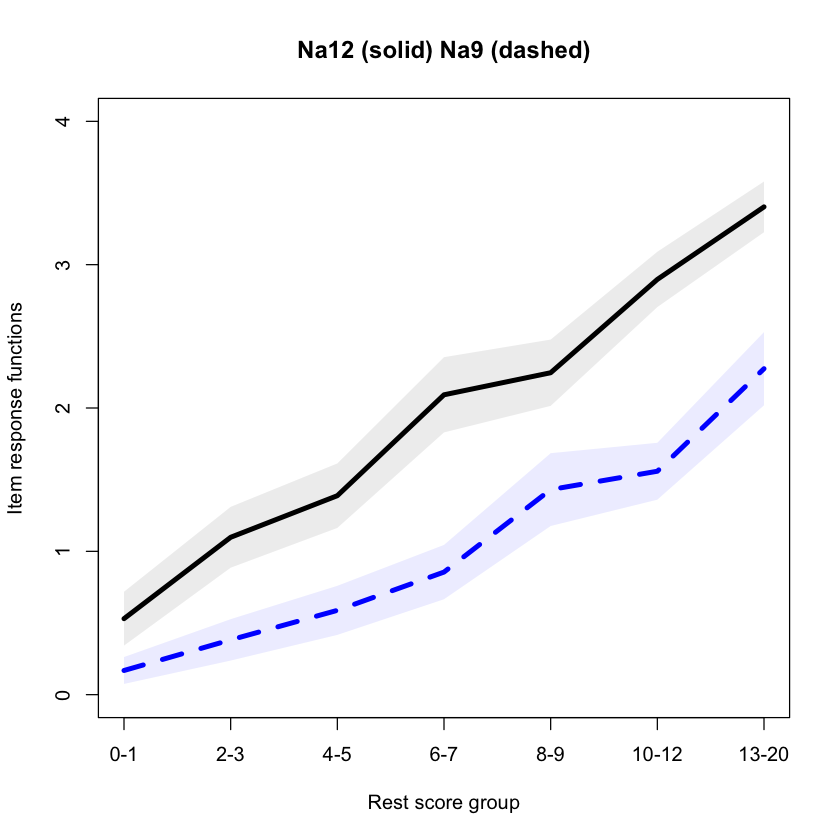

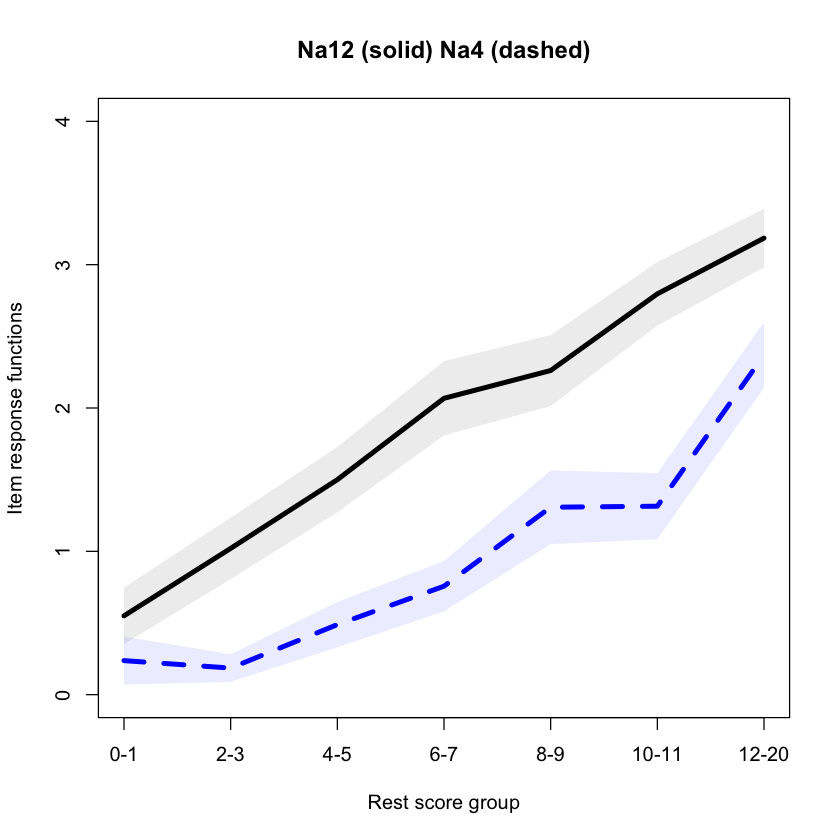

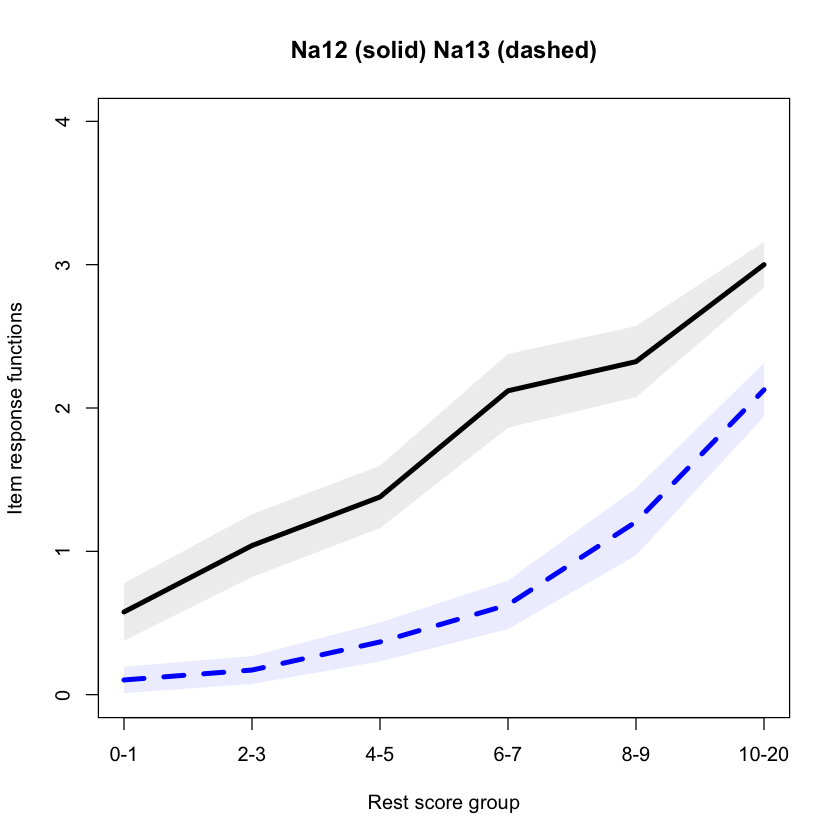

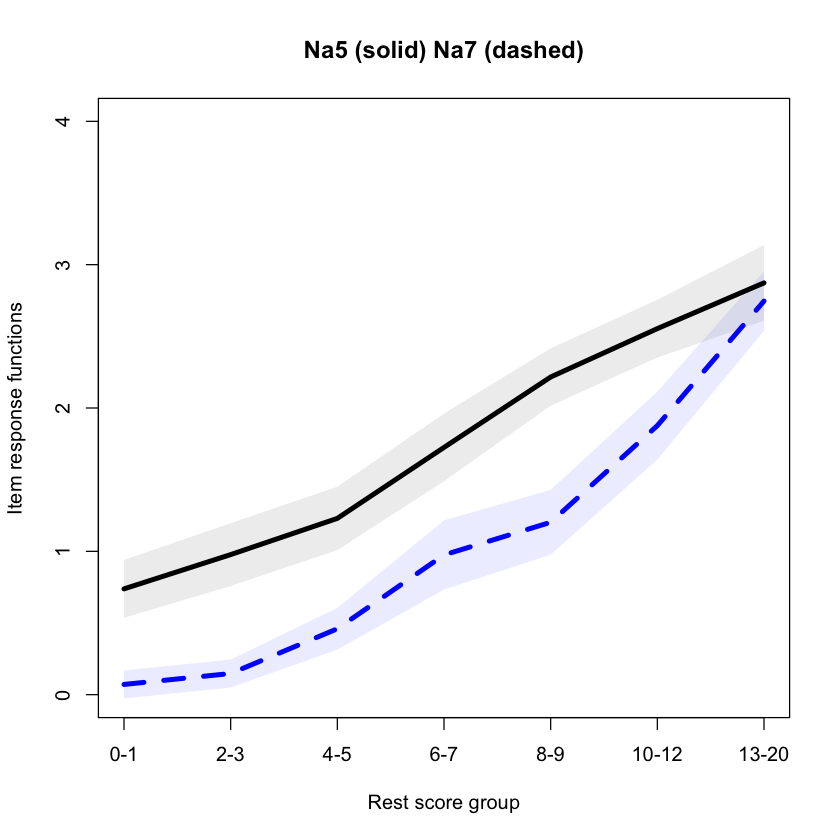

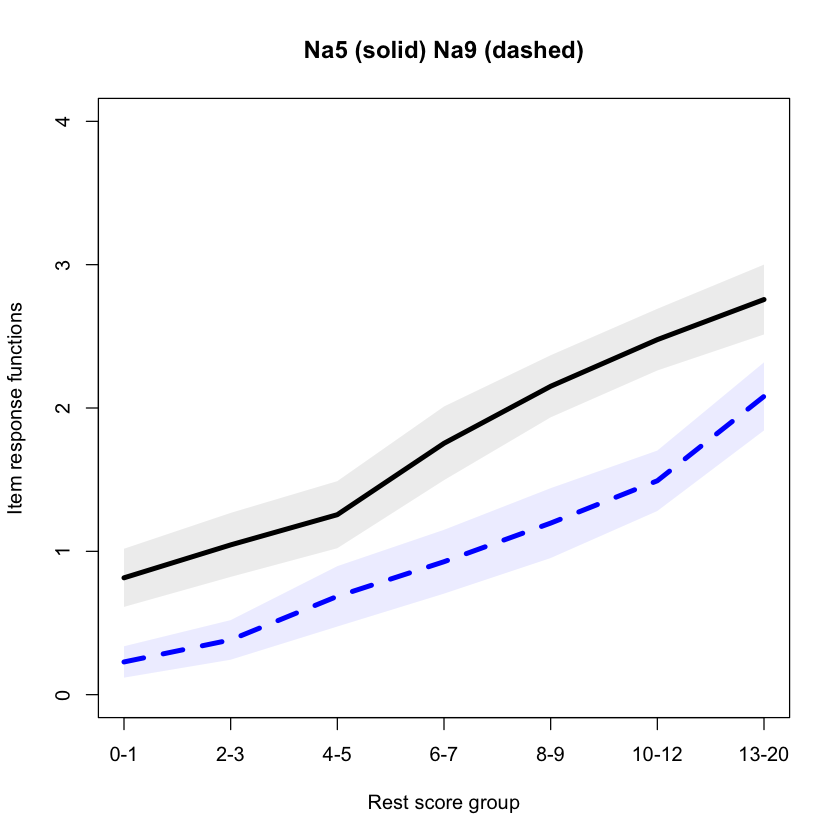

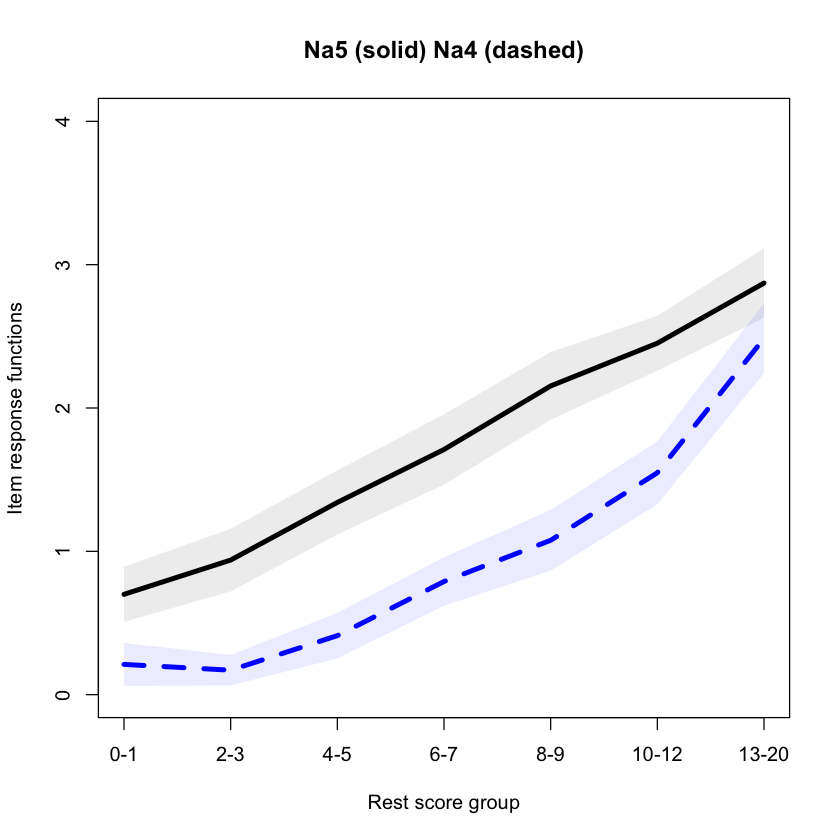

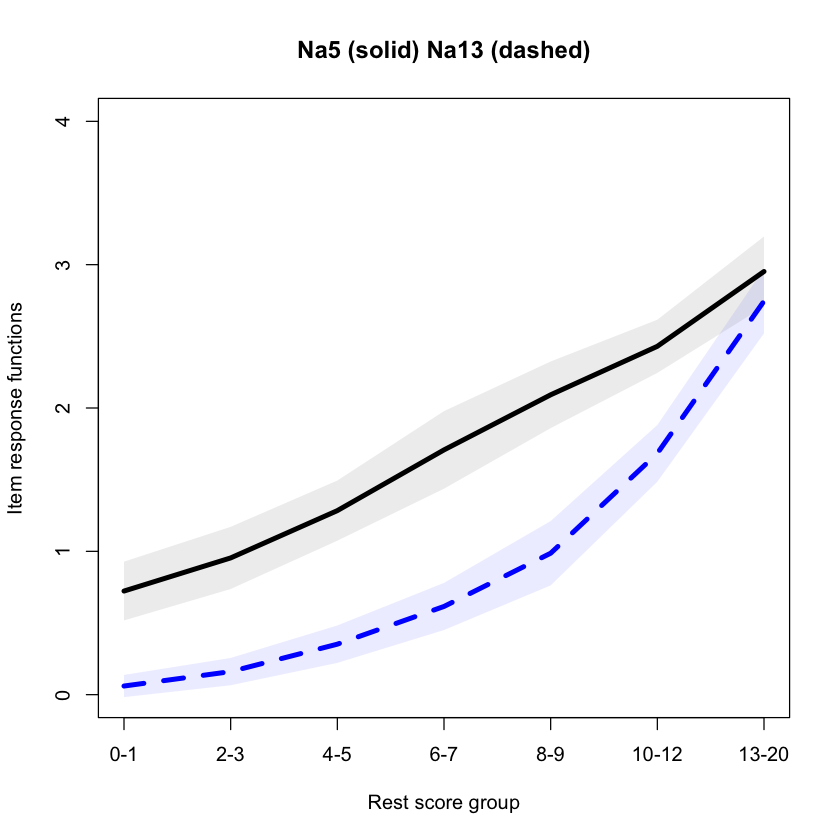

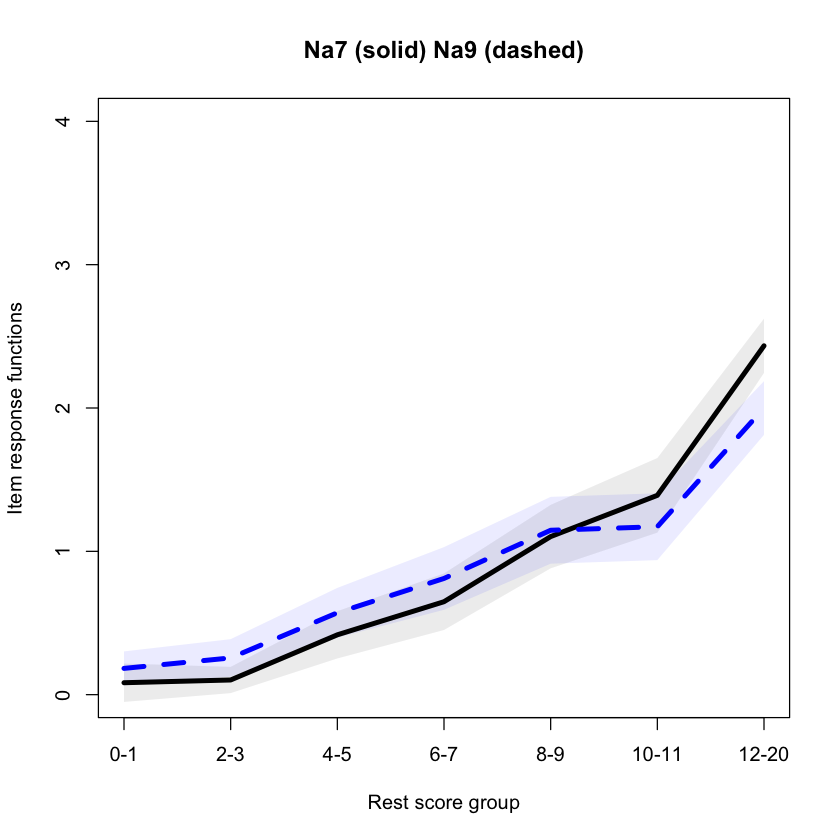

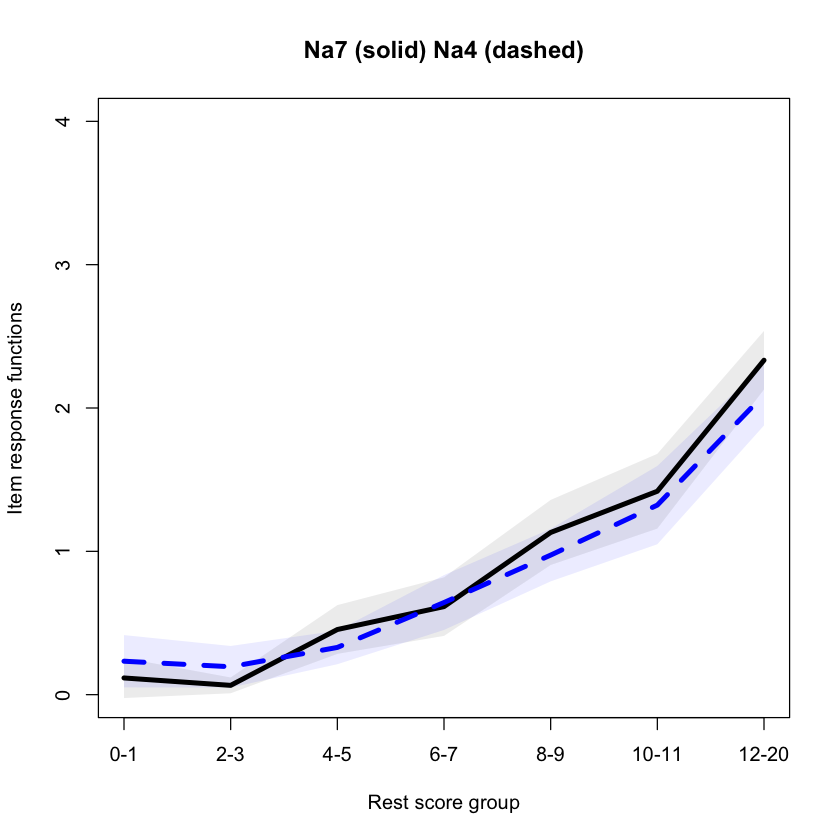

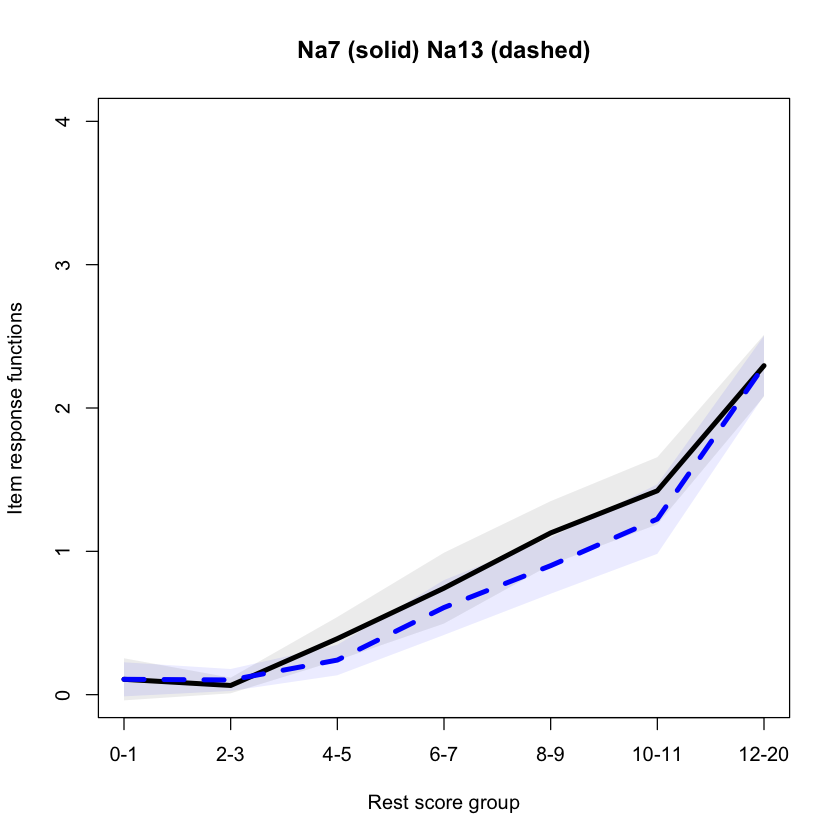

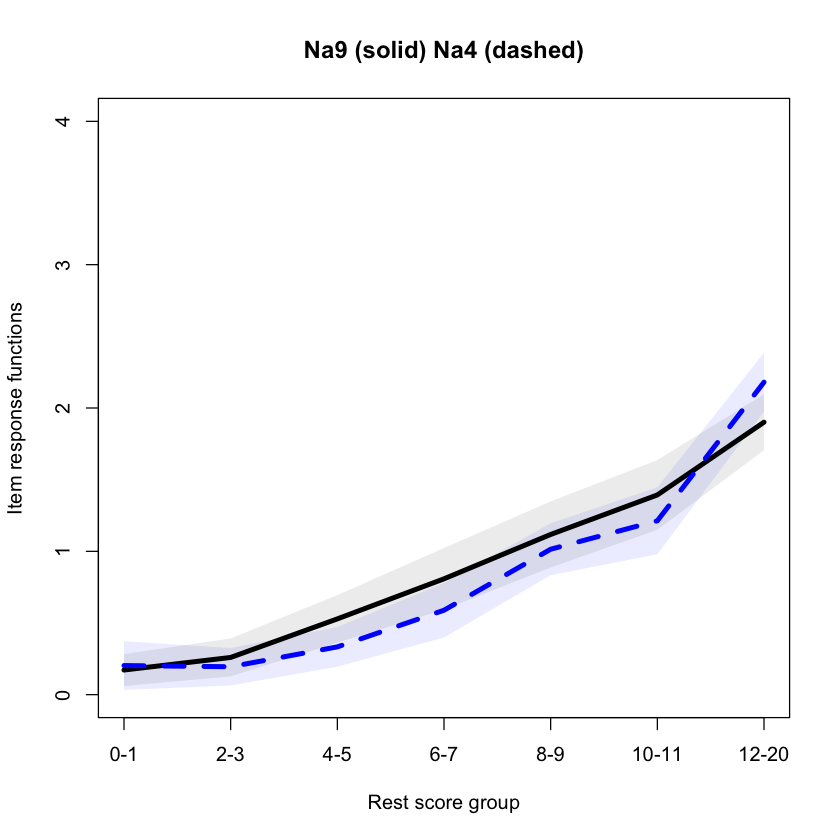

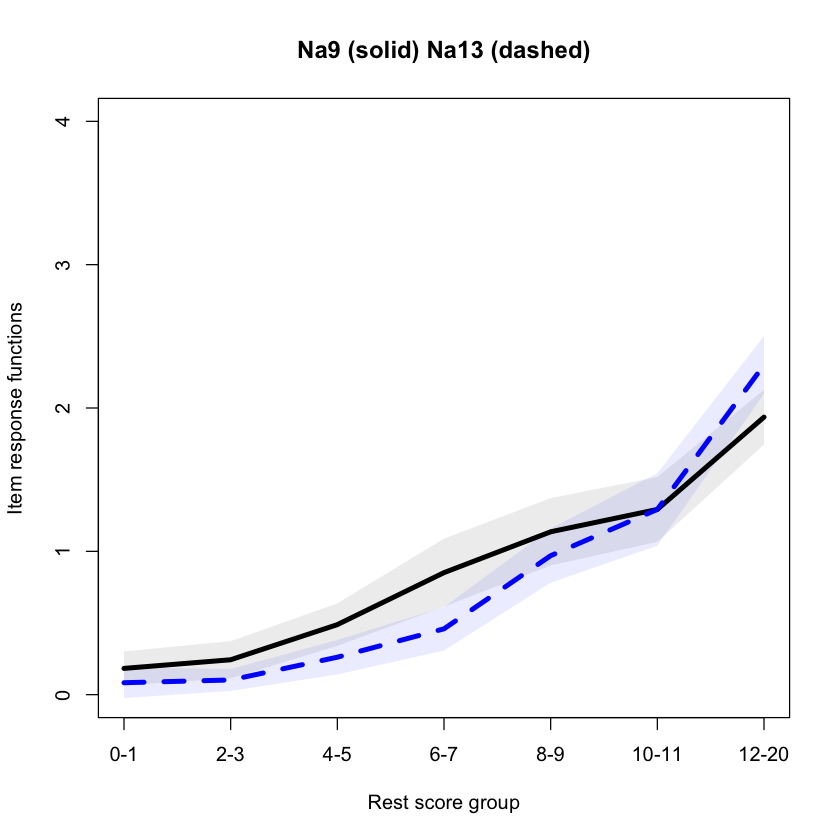

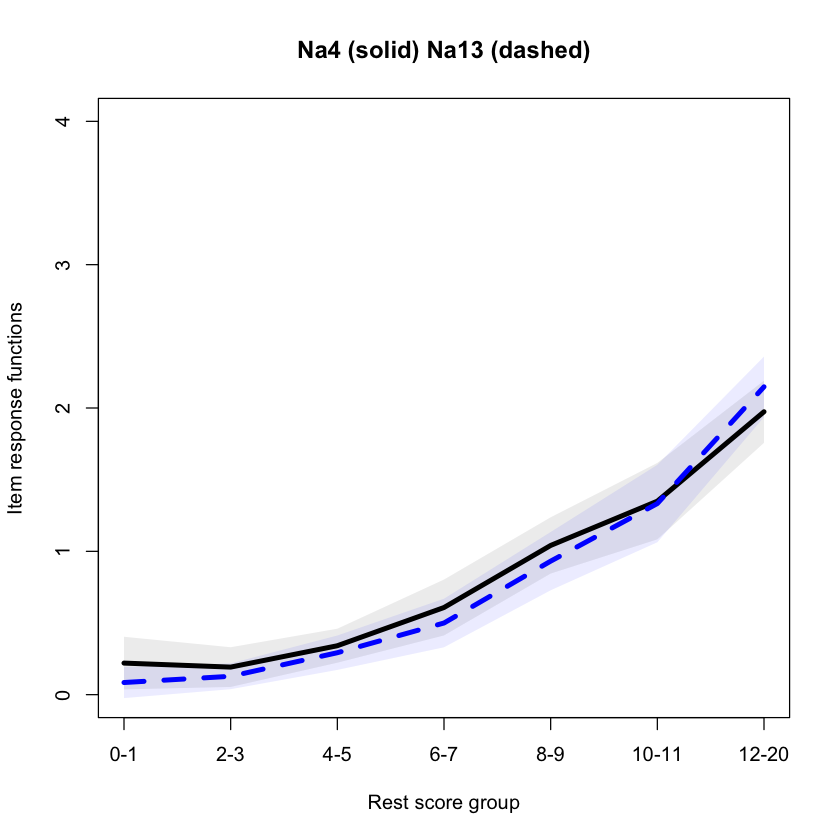

In [117]:
# visual inspection
plot(resIioNa)

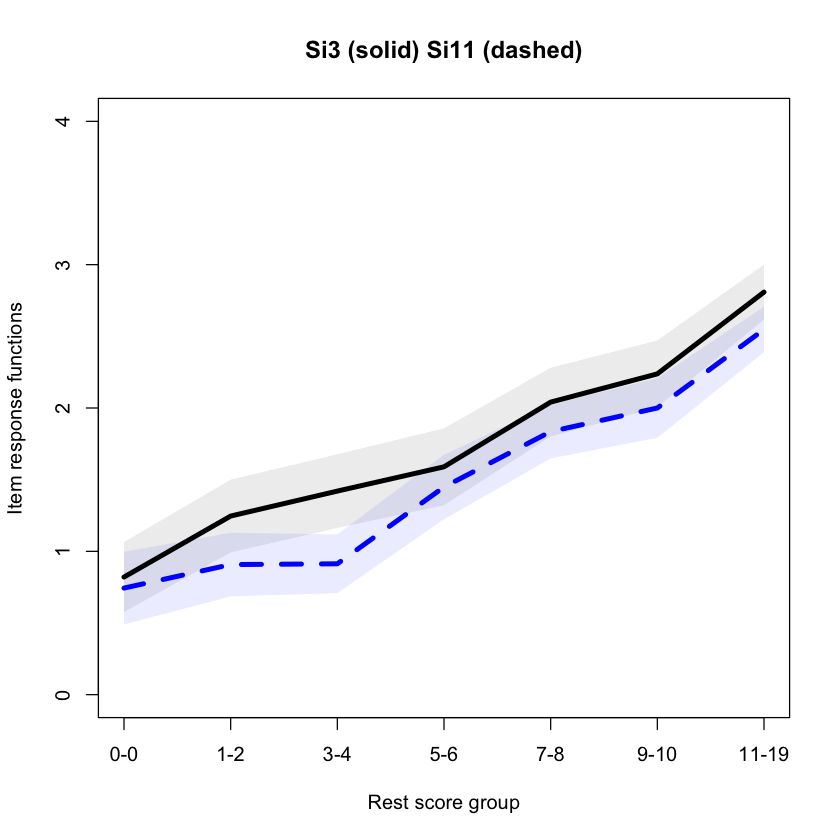

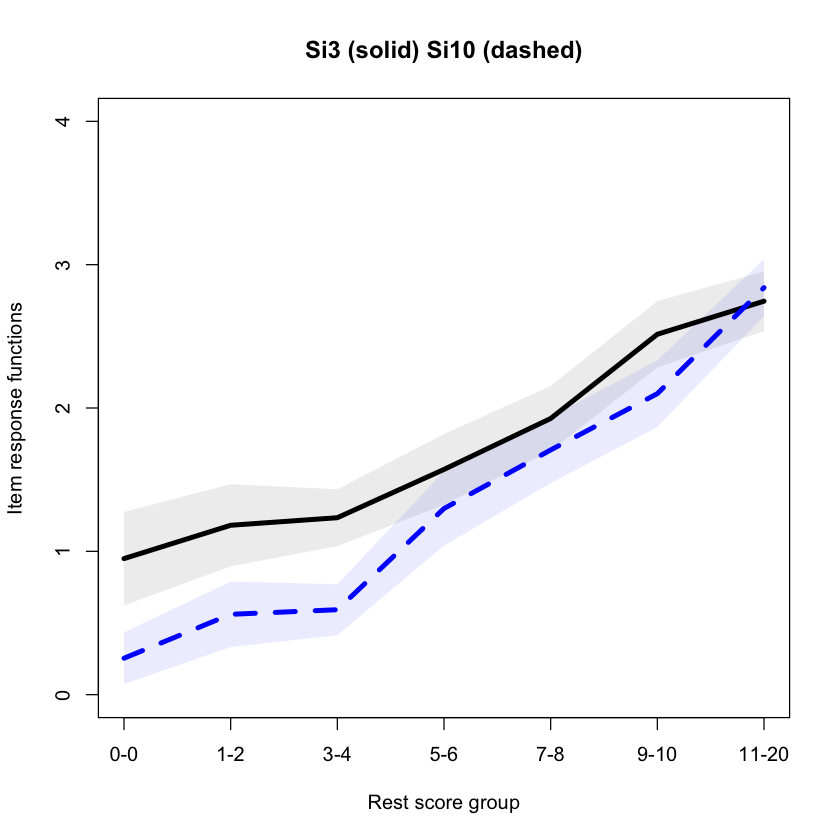

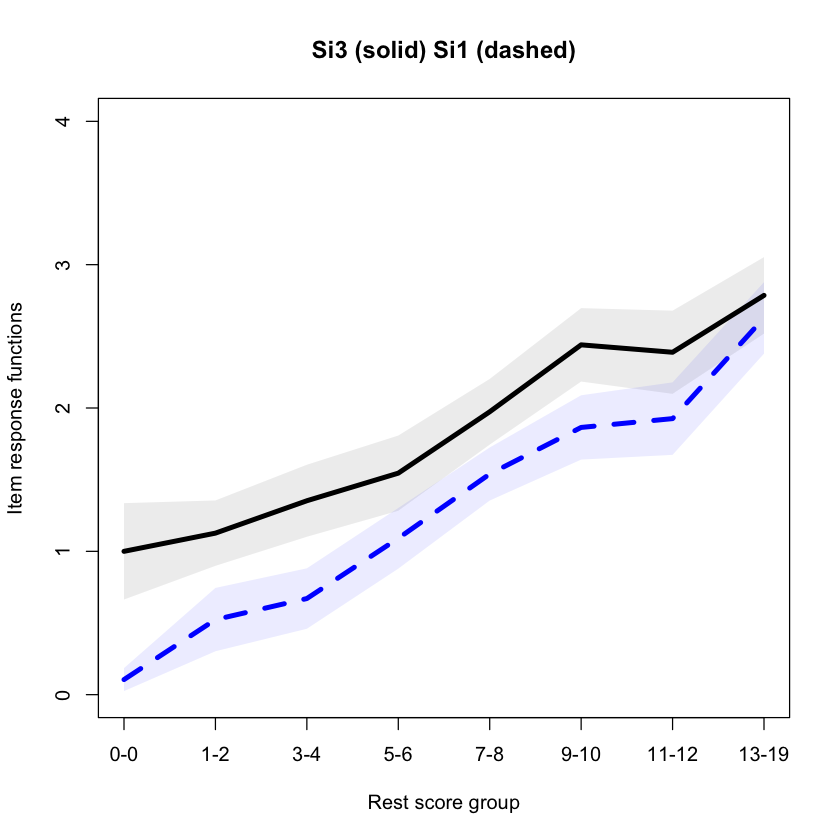

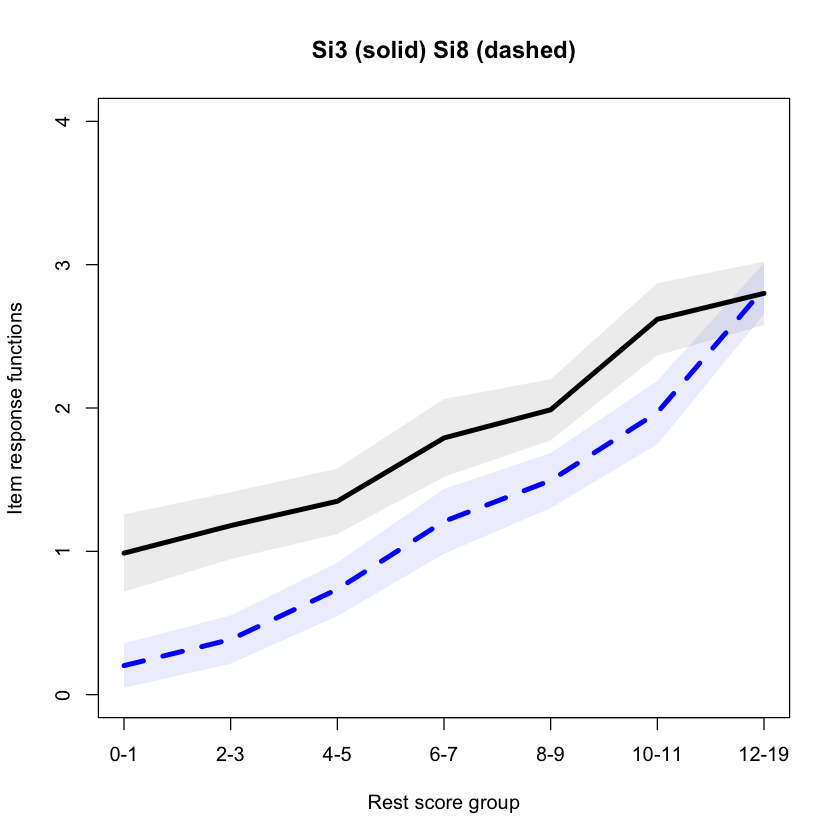

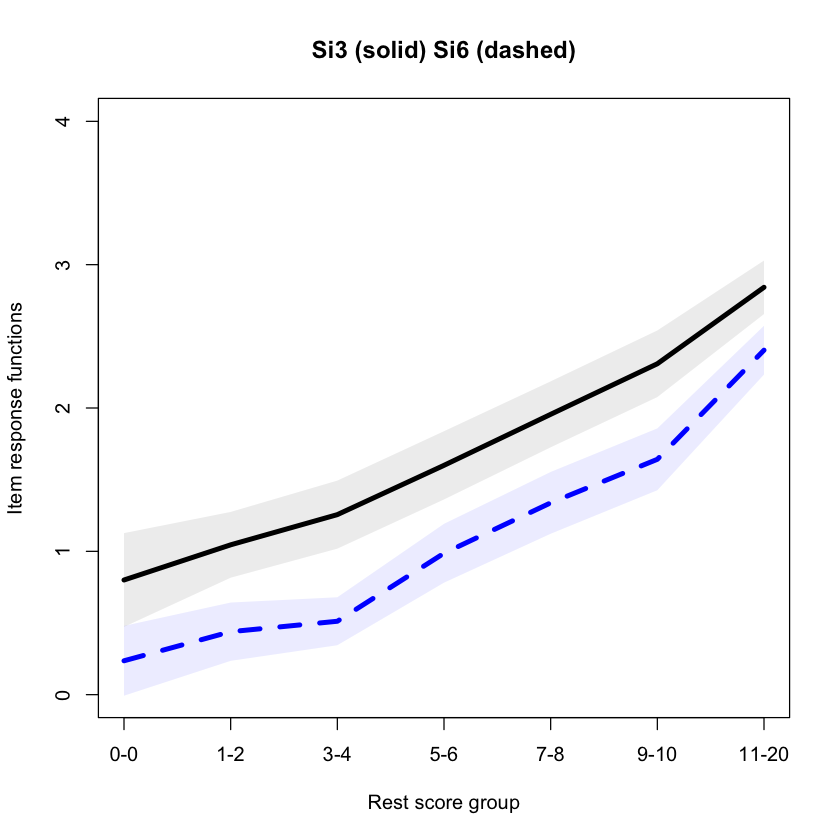

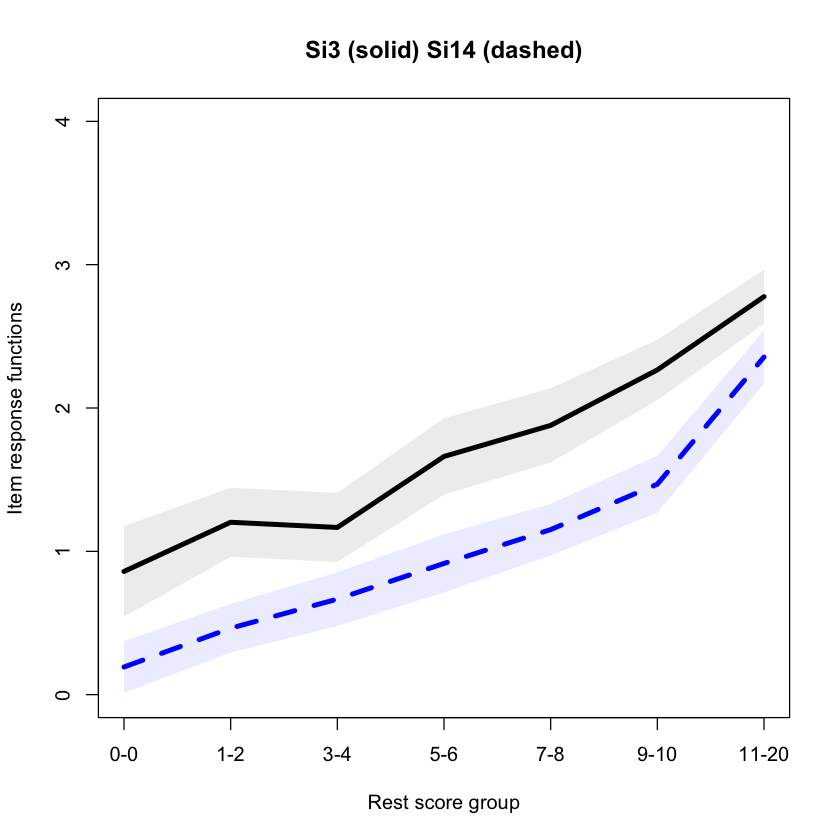

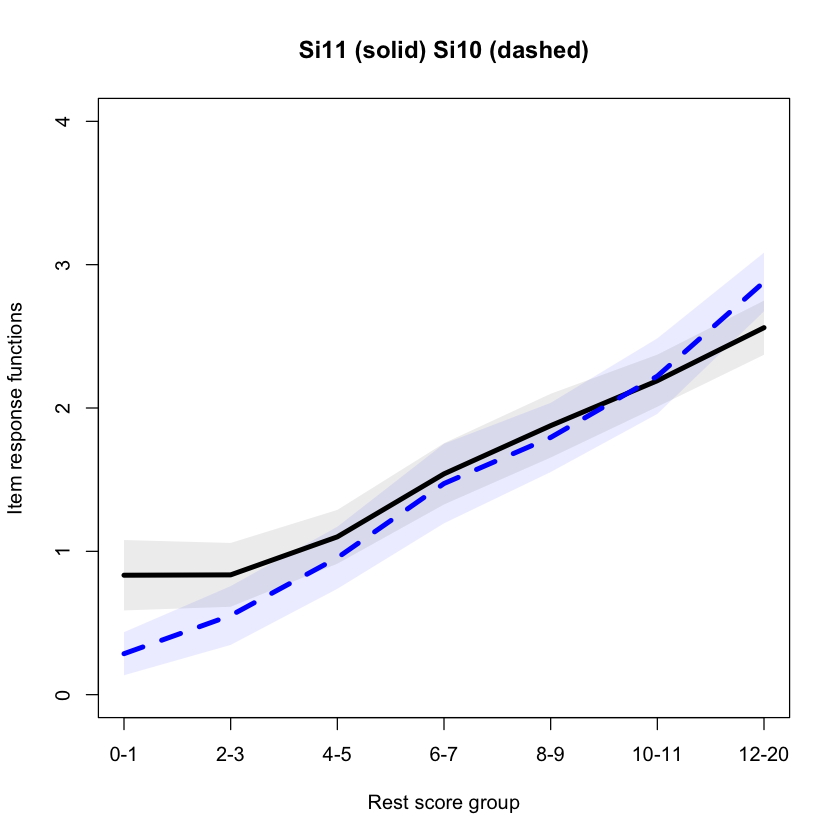

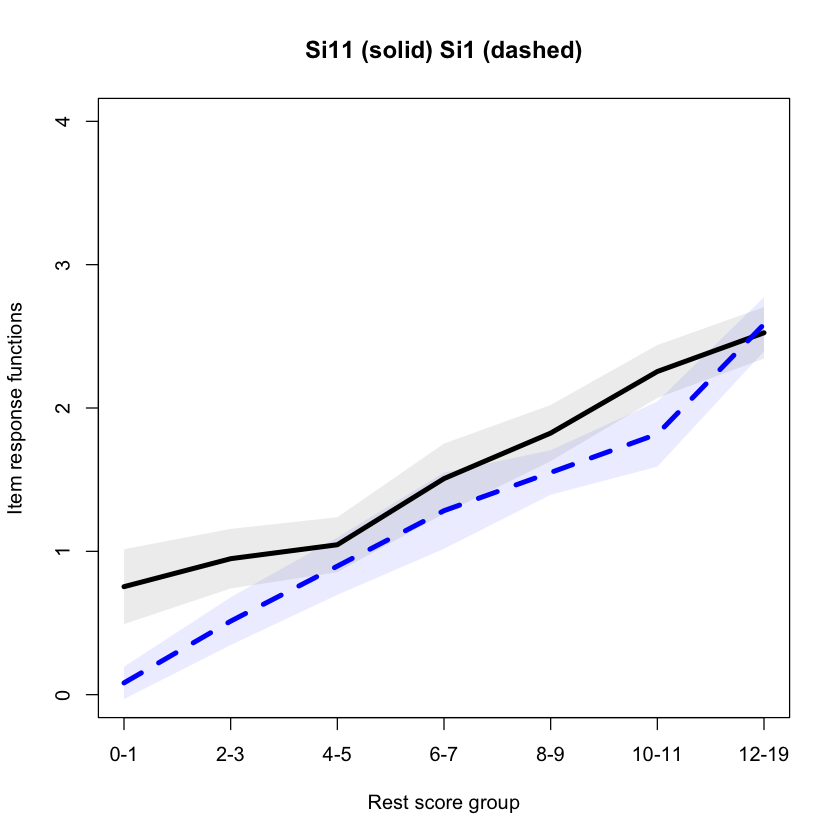

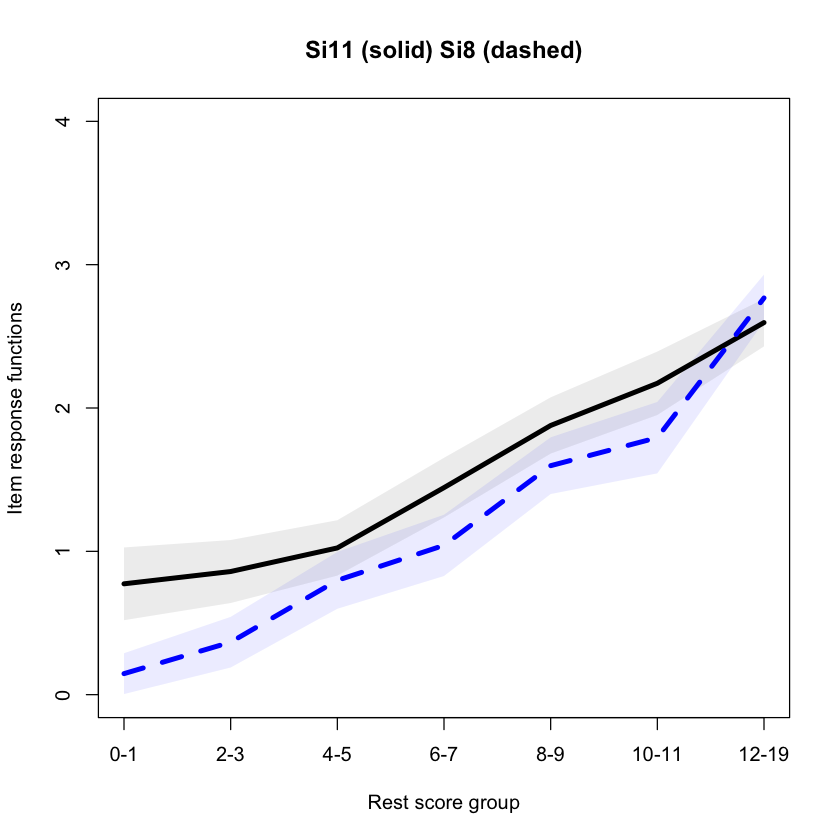

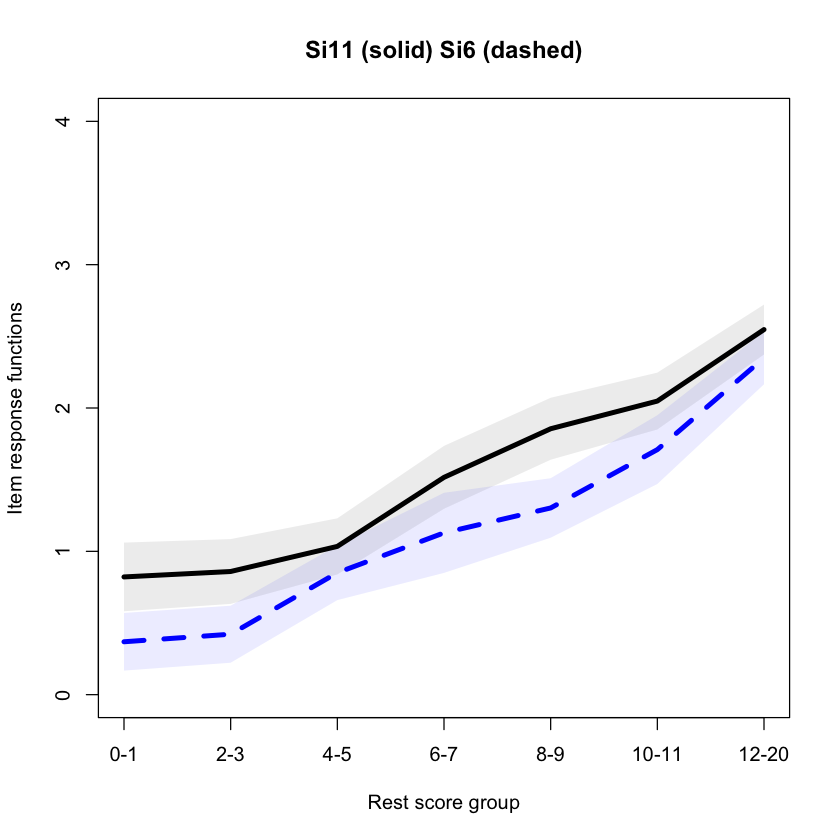

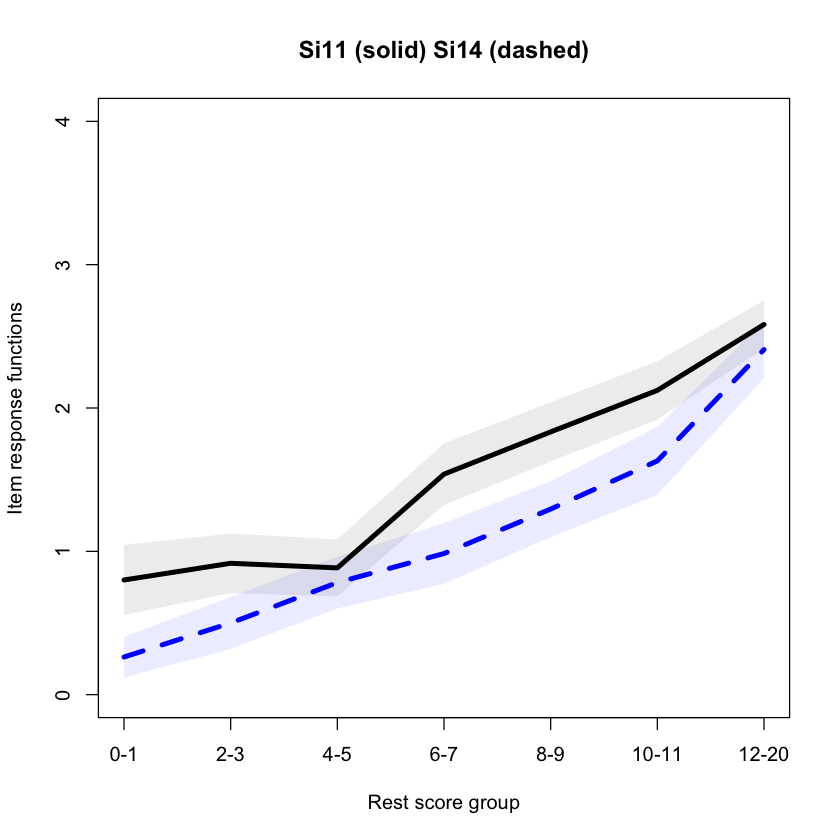

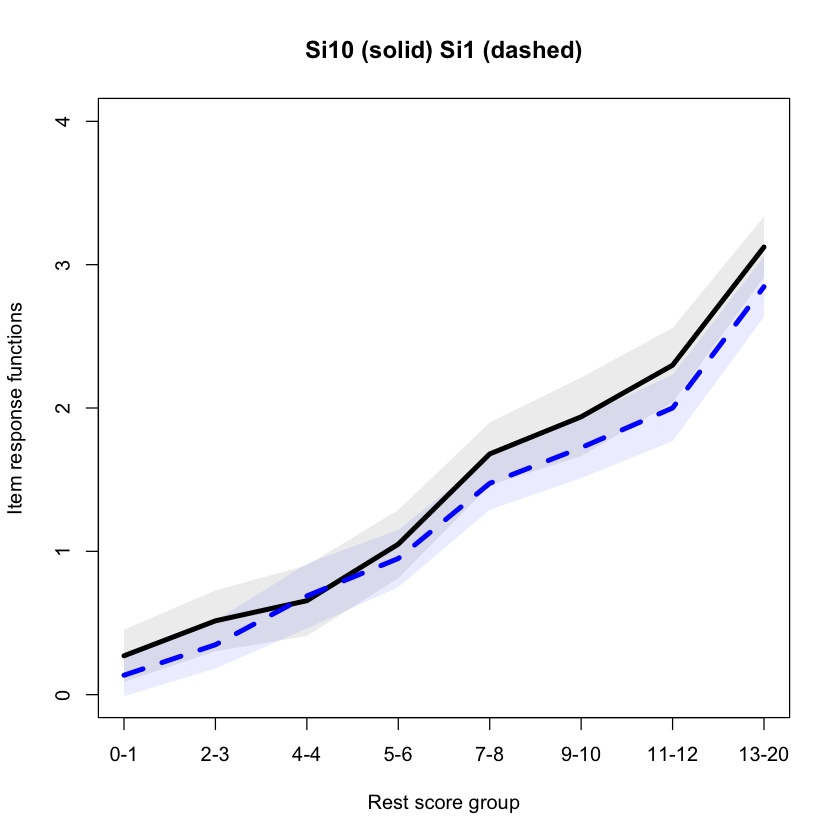

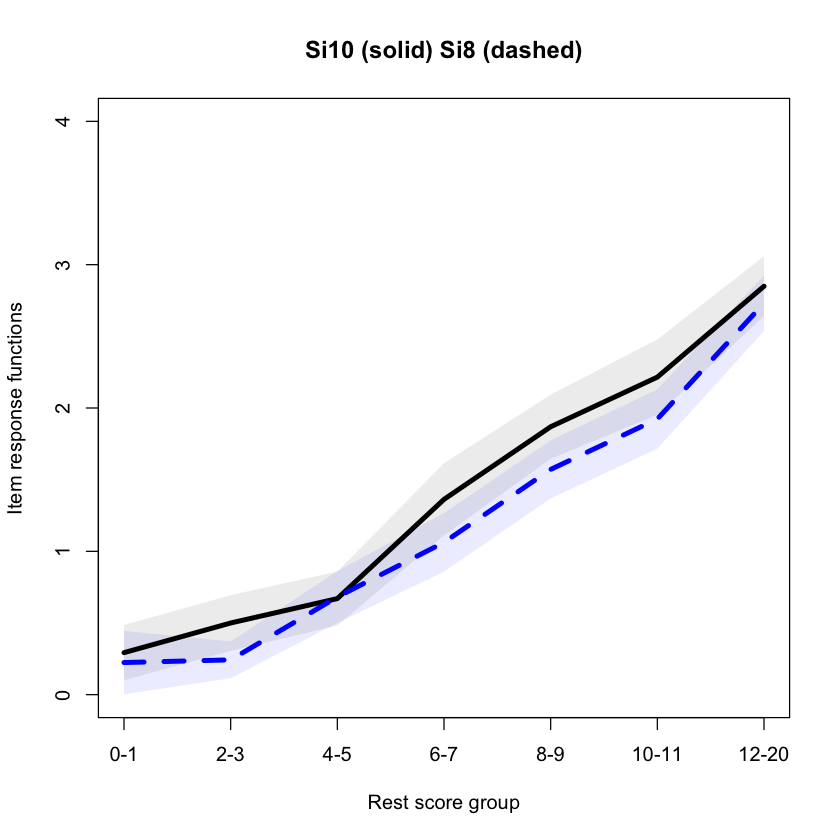

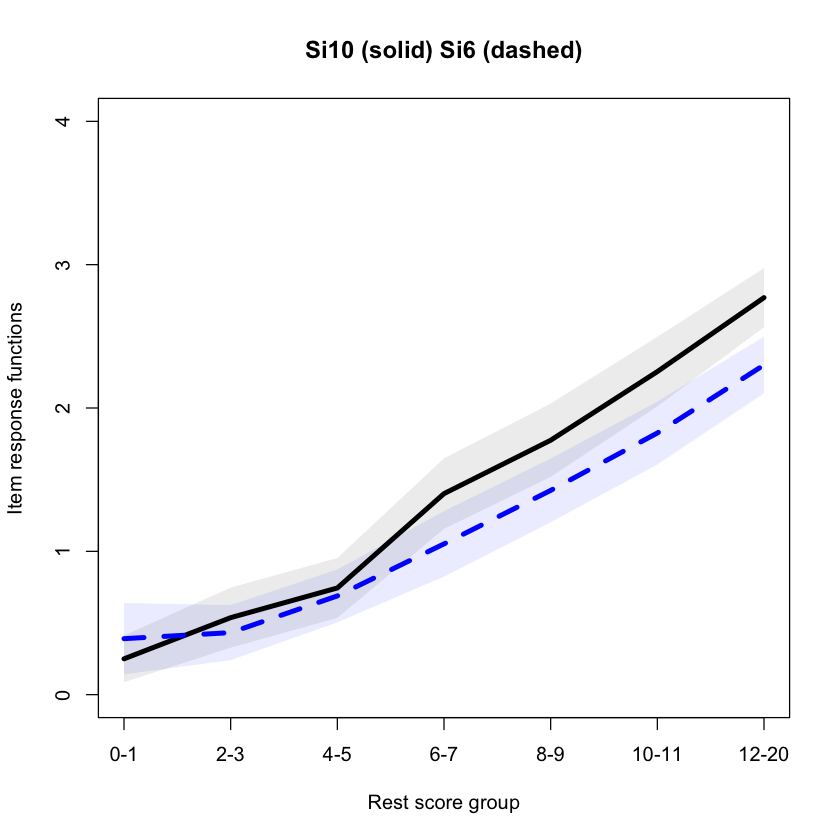

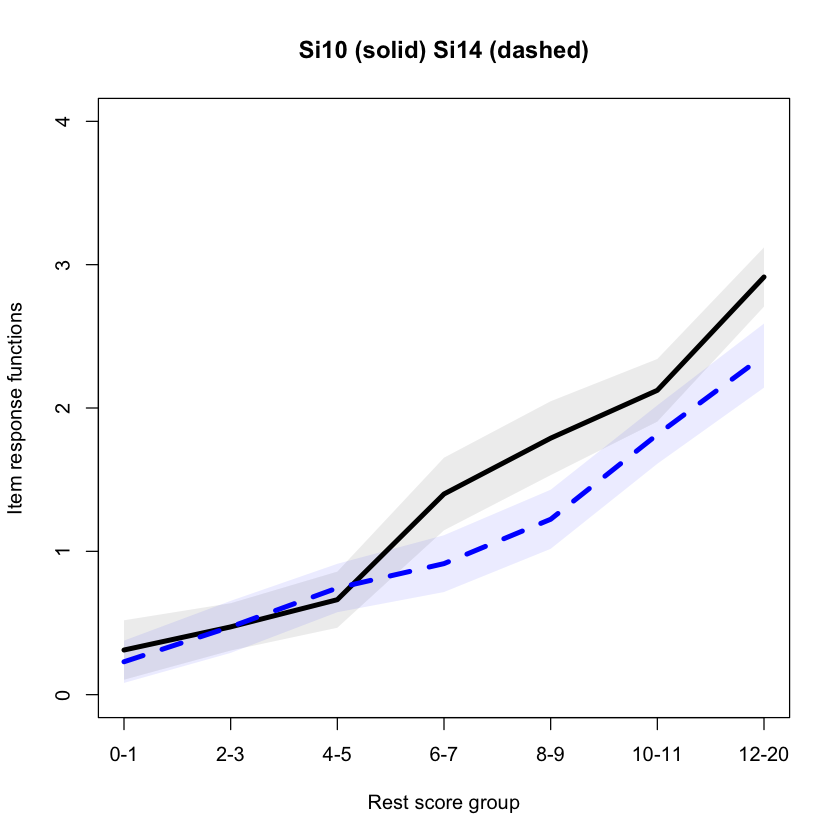

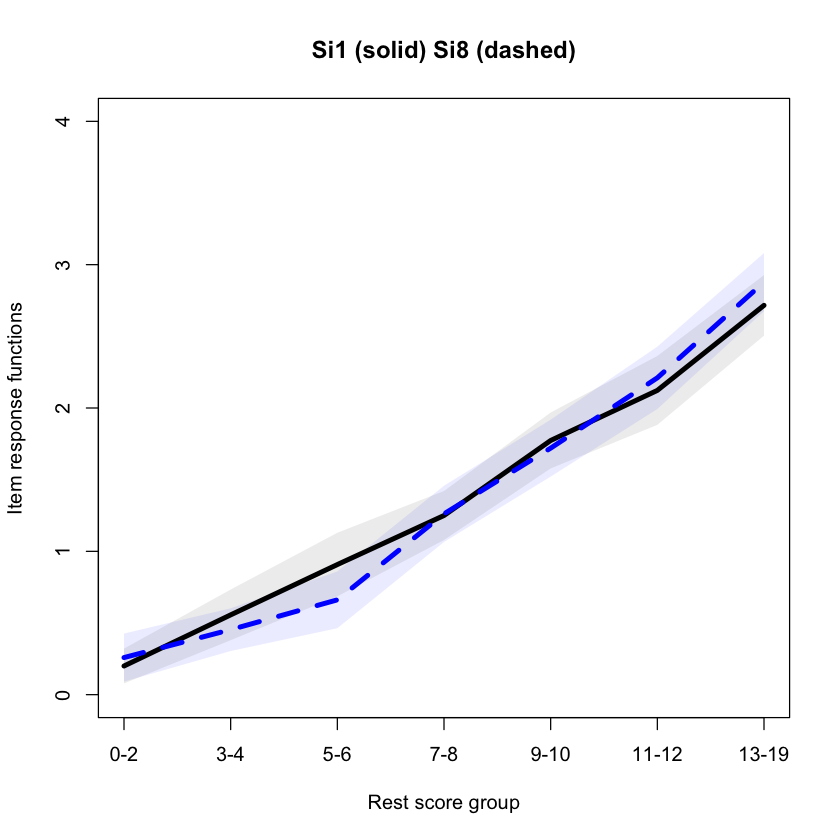

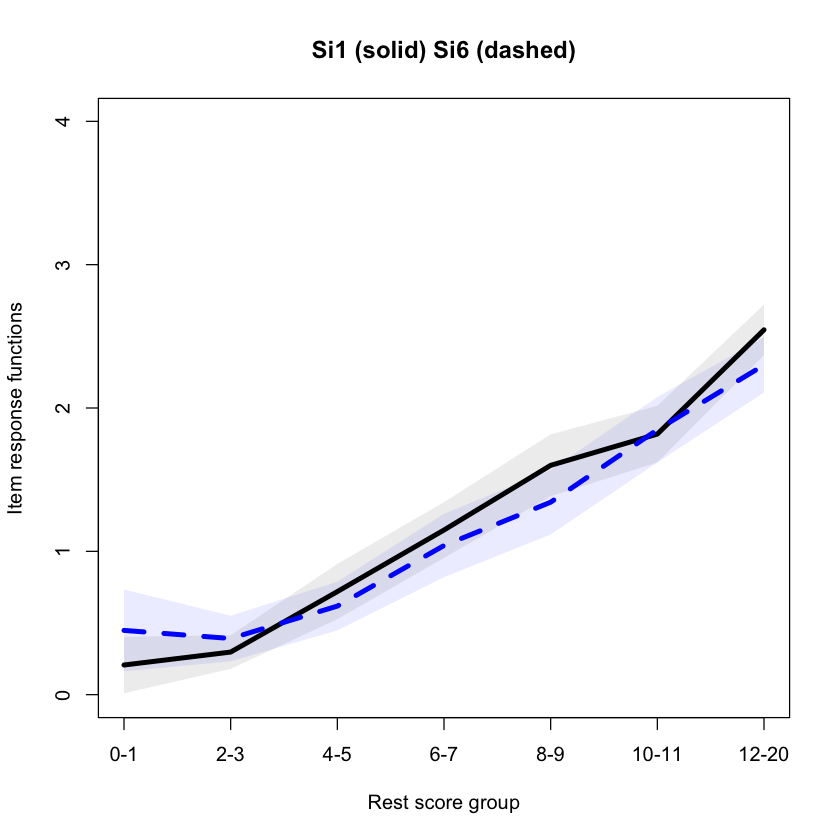

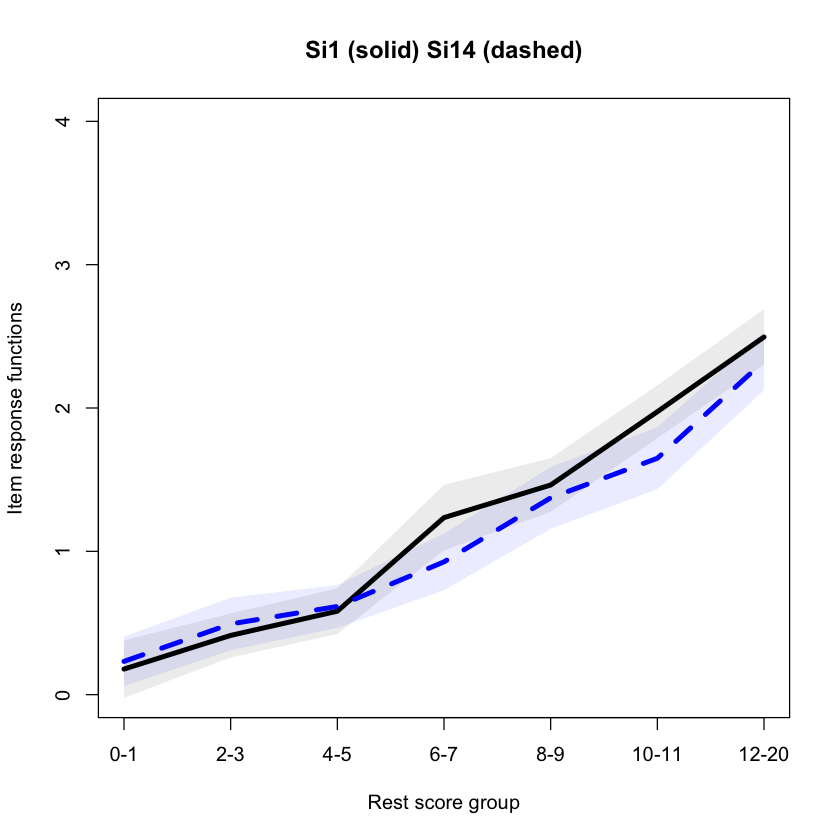

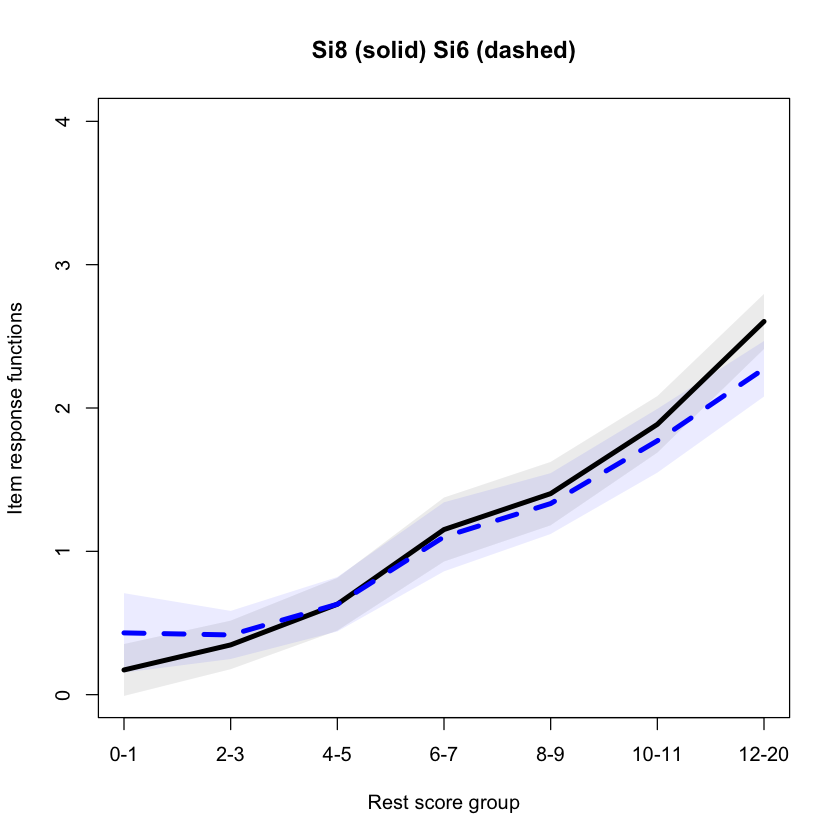

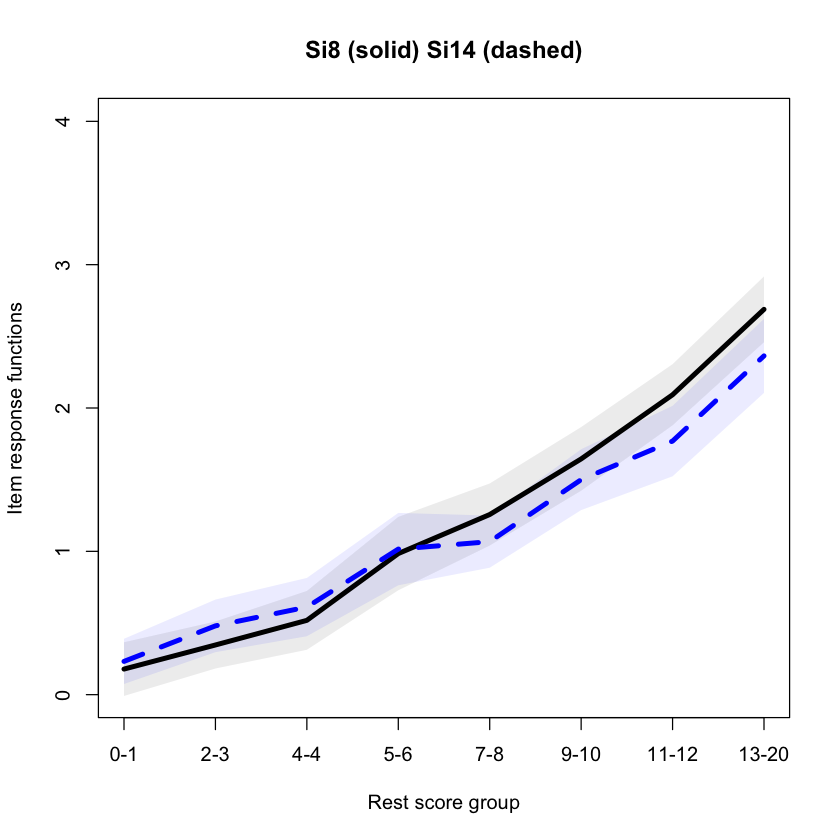

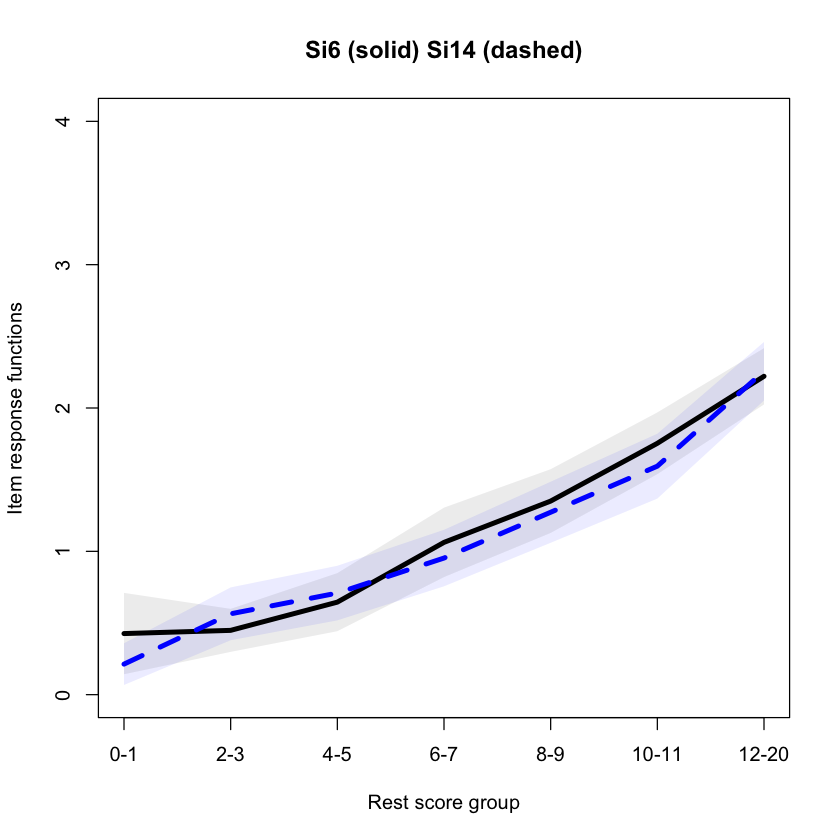

In [118]:
plot(resIioSi)

In [119]:
# Results from Method IT
resIioDsIt <- check.iio(itemsScores, method = "IT")
summary(resIioDsIt)

,ItemH,#ac,#vi,#vi/#ac,maxvi,sum,sum/#ac,xmax,#xsig,crit
Na2,0.28,930,67,0.07,0.10,3.28,0.0035,5.00,5,95
Na12,0.37,940,68,0.07,0.14,3.92,0.0042,7.00,10,117
Si3,0.22,960,65,0.07,0.14,3.44,0.0036,7.12,9,120
Na5,0.31,930,72,0.08,0.12,3.87,0.0042,6.00,6,106
Si11,0.34,960,69,0.07,0.14,3.78,0.0039,7.00,9,116
Si10,0.37,910,84,0.09,0.11,4.12,0.0045,7.12,12,122
Si1,0.35,950,65,0.07,0.10,3.37,0.0035,6.00,8,103
Si8,0.41,940,60,0.06,0.16,3.24,0.0034,6.00,6,101
Si6,0.44,960,69,0.07,0.14,3.63,0.0038,7.14,11,115
Si14,0.38,930,56,0.06,0.13,2.87,0.0031,6.40,6,99


**iii. Proprietà della scala.** Determinare le proprietà della scala delle scale identificate nella seconda fase (passi 8–10).

## Step 8

8. **Affidabilità.** Utilizzare il metodo Molenaar–Sijtsma (MS) (Sijtsma & Molenaar, 1987) per stimare l'affidabilità del punteggio del test. Il metodo MS assume il modello di doppia monotonia.

In [120]:
# STEP 8: RELIABILITY
check.reliability(itemsScores[, Na], irc = TRUE)
check.reliability(itemsScores[, Si], irc = TRUE)
check.reliability(itemsScores, irc = TRUE)
check.reliability(itemsScores[, -3])

$MS
[1] 0.8831192

$alpha
[1] 0.8730833

$lambda.2
[1] 0.8754562

$irc
[1] 0.5611093 0.6726663 0.5979601 0.7204285 0.6203443 0.6732260 0.7455937

$MS
[1] 0.8705858

$alpha
[1] 0.8705257

$lambda.2
[1] 0.8730023

$irc
[1] 0.7195313 0.5375498 0.6163735 0.7324143 0.6890863 0.5955926 0.6458434

$MS
[1] 0.8814835

$alpha
[1] 0.8746705

$lambda.2
[1] 0.8832171

$irc
 [1] 0.5216845 0.4086019 0.3271220 0.5960368 0.4584861 0.6691542 0.6462265
 [8] 0.6231587 0.5247777 0.5664850 0.4960871 0.5494261 0.6221260 0.5681157

$MS
[1] 0.8920327

$alpha
[1] 0.8771852

$lambda.2
[1] 0.8841594

Tutte le stime sono molto alte e quindi soddisfacenti.

## Step 9.

9. **Norme.** 

Nell'ambito della verifica delle scale Mokken, i ricercatori possono necessitare di tabelle normative per effettuare misurazioni accurate sugli individui. Una soluzione proposta da Oosterhuis, Van der Ark, e Sijtsma (2016) prevede l'utilizzo di una procedura di regressione per stimare le norme e gli intervalli di confidenza relativi a queste norme. Questo metodo consente di avere riferimenti quantitativi chiari e basati sulla statistica per valutare i risultati dei test in un contesto normativo.

Nel contesto della ricerca scientifica, tuttavia, l'uso di norme per interpretare le prestazioni ai test può non essere necessario. In questi casi, la fase di stima delle norme può essere omessa. Questo approccio è particolarmente utile quando l'obiettivo della ricerca è esplorare relazioni teoriche o costrutti piuttosto che valutare le performance individuali rispetto a un gruppo normativo. La decisione di includere o escludere la stima delle norme dipenderà quindi dagli obiettivi specifici dello studio e dal contesto in cui il test viene applicato.

In [121]:
# STEP 9: NORMS
check.norms(xPlusNa[male == 1])$perc
check.norms(xPlusNa[male == 0])$perc
check.norms(xPlusSi[male == 1])$perc
check.norms(xPlusSi[male == 0])$perc
check.norms(xPlus[male == 1])$perc
check.norms(xPlus[male == 0])$perc

   Percentiles SE      lo      up     
0    2.854     (0.533)   1.809   3.900
1    7.822     (1.141)   5.587  10.058
2   14.376     (1.461)  11.514  17.239
3   22.199     (1.815)  18.642  25.756
4   28.224     (2.001)  24.302  32.146
5   34.461     (2.096)  30.352  38.570
6   41.226     (2.188)  36.938  45.515
7   46.934     (2.235)  42.553  51.316
8   51.586     (2.249)  47.178  55.993
9   55.497     (2.243)  51.100  59.893
10  60.465     (2.172)  56.208  64.723
11  66.068     (2.117)  61.918  70.217
12  70.930     (2.025)  66.960  74.900
13  75.053     (1.944)  71.242  78.863
14  78.647     (1.830)  75.060  82.234
15  82.241     (1.706)  78.898  85.584
16  85.412     (1.574)  82.327  88.497
17  88.055     (1.449)  85.214  90.896
18  90.592     (1.287)  88.069  93.115
19  93.129     (1.109)  90.955  95.303
20  95.137     (0.943)  93.290  96.985
21  96.300     (0.848)  94.637  97.963
22  97.252     (0.706)  95.868  98.635
23  98.309     (0.554)  97.223  99.394
24  98.943     (0.446)  9

   Percentiles SE      lo      up     
0    2.206     (1.245)  -0.235   4.646
1    5.147     (2.577)   0.097  10.197
2    6.618     (2.924)   0.887  12.348
4    9.559     (3.330)   3.031  16.086
5   14.706     (4.035)   6.797  22.615
6   21.324     (4.687)  12.137  30.510
7   31.618     (5.189)  21.446  41.789
8   39.706     (5.842)  28.256  51.156
9   43.382     (5.874)  31.870  54.895
10  48.529     (5.880)  37.005  60.054
11  52.941     (5.963)  41.254  64.628
12  55.147     (5.986)  43.414  66.880
13  60.294     (5.654)  49.213  71.375
14  66.912     (5.562)  56.010  77.813
15  71.324     (5.334)  60.868  81.779
16  77.206     (4.814)  67.770  86.642
17  81.618     (4.639)  72.525  90.711
18  83.824     (4.343)  75.312  92.335
19  86.029     (4.139)  77.916  94.143
20  88.235     (3.766)  80.854  95.617
21  90.441     (3.489)  83.603  97.280
23  91.912     (3.224)  85.593  98.230
24  93.382     (2.924)  87.652  99.113
25  94.853     (2.577)  89.803  99.903
26  97.059     (1.765)  9

   Percentiles SE      lo      up     
0    2.854     (0.533)   1.809   3.900
1    7.188     (1.120)   4.993   9.383
2   10.359     (1.336)   7.741  12.978
3   15.433     (1.550)  12.396  18.471
4   21.776     (1.813)  18.222  25.330
5   27.801     (1.980)  23.921  31.682
6   33.298     (2.107)  29.169  37.427
7   38.372     (2.173)  34.114  42.630
8   43.129     (2.228)  38.763  47.495
9   47.569     (2.242)  43.174  51.963
10  52.537     (2.234)  48.158  56.916
11  57.611     (2.215)  53.270  61.952
12  62.896     (2.152)  58.678  67.115
13  67.759     (2.099)  63.645  71.873
14  72.410     (1.986)  68.518  76.303
15  77.061     (1.877)  73.381  80.741
16  81.395     (1.719)  78.026  84.765
17  85.201     (1.584)  82.096  88.306
18  88.372     (1.412)  85.605  91.140
19  91.543     (1.217)  89.159  93.928
20  93.658     (1.090)  91.520  95.795
21  95.032     (0.959)  93.152  96.912
22  95.983     (0.890)  94.238  97.728
23  97.146     (0.697)  95.780  98.512
24  98.414     (0.544)  9

   Percentiles SE      lo      up     
0    1.471     (1.024)  -0.537   3.479
1    5.882     (2.445)   1.090  10.675
2   11.029     (3.579)   4.015  18.044
3   15.441     (4.193)   7.223  23.659
4   23.529     (4.705)  14.308  32.751
5   33.088     (5.464)  22.379  43.798
6   38.971     (5.775)  27.651  50.290
7   44.118     (5.839)  32.673  55.562
8   50.000     (5.882)  38.471  61.529
9   54.412     (5.950)  42.751  66.073
10  58.824     (5.784)  47.486  70.161
11  63.235     (5.754)  51.958  74.513
12  66.912     (5.562)  56.010  77.813
13  74.265     (4.932)  64.599  83.931
14  81.618     (4.521)  72.756  90.479
16  86.029     (4.007)  78.176  93.882
17  89.706     (3.535)  82.777  96.635
18  91.912     (3.224)  85.593  98.230
20  93.382     (2.924)  87.652  99.113
21  94.853     (2.577)  89.803  99.903
24  96.324     (2.160)  92.089 100.558
26  98.529     (1.024)  96.521 100.537

   Percentiles SE      lo      up     
0    0.634     (0.257)   0.130   1.139
1    1.480     (0.535)   0.432   2.528
2    2.326     (0.643)   1.066   3.585
3    4.017     (0.839)   2.373   5.661
4    5.920     (1.043)   3.875   7.964
5    8.140     (1.198)   5.791  10.488
6   10.677     (1.376)   7.980  13.373
7   13.742     (1.518)  10.766  16.718
8   17.548     (1.690)  14.234  20.861
9   20.613     (1.827)  17.033  24.193
10  23.784     (1.903)  20.055  27.514
11  27.061     (2.010)  23.122  31.000
12  30.444     (2.062)  26.402  34.486
13  34.144     (2.142)  29.946  38.341
14  36.998     (2.190)  32.706  41.289
15  40.592     (2.203)  36.274  44.910
16  44.186     (2.254)  39.768  48.604
17  47.357     (2.252)  42.944  51.770
18  51.586     (2.244)  47.188  55.983
19  55.497     (2.248)  51.091  59.903
20  58.774     (2.223)  54.416  63.132
21  61.839     (2.201)  57.526  66.153
22  64.799     (2.157)  60.570  69.028
23  67.442     (2.128)  63.270  71.614
24  69.979     (2.070)  6

   Percentiles SE      lo      up     
4    2.206     (1.245)  -0.235   4.646
5    5.147     (2.577)   0.097  10.197
6    6.618     (2.924)   0.887  12.348
7    8.824     (3.279)   2.397  15.250
8   12.500     (3.803)   5.046  19.954
9   16.176     (4.343)   7.665  24.688
10  20.588     (4.678)  11.420  29.756
11  24.265     (5.146)  14.178  34.351
12  25.735     (5.250)  15.445  36.026
13  28.676     (5.334)  18.221  39.132
14  31.618     (5.591)  20.660  42.575
15  33.824     (5.642)  22.765  44.882
16  38.235     (5.707)  27.050  49.420
17  41.912     (5.938)  30.273  53.551
18  44.118     (5.931)  32.493  55.742
20  47.059     (5.963)  35.372  58.746
21  52.206     (5.830)  40.779  63.633
22  58.088     (5.846)  46.629  69.547
23  61.765     (5.801)  50.395  73.134
24  63.971     (5.775)  52.651  75.290
25  66.912     (5.562)  56.010  77.813
26  71.324     (5.334)  60.868  81.779
28  74.265     (5.250)  63.974  84.555
29  76.471     (5.038)  66.597  86.345
30  79.412     (4.792)  7

In [122]:
# STEP 10: GROUP COMPARISON
coefH(itemsScores[, Na], group.var = male)
coefH(itemsScores[, Si], group.var = male)
coefH(itemsScores[, ], group.var = male)

$Hij
     Na2     se      Na4     se      Na5     se      Na7     se      Na9    
Na2                   0.391  (0.048)  0.522  (0.039)  0.465  (0.045)  0.468 
Na4   0.391  (0.048)                  0.439  (0.047)  0.661  (0.039)  0.503 
Na5   0.522  (0.039)  0.439  (0.047)                  0.499  (0.040)  0.581 
Na7   0.465  (0.045)  0.661  (0.039)  0.499  (0.040)                  0.555 
Na9   0.468  (0.045)  0.503  (0.045)  0.581  (0.038)  0.555  (0.043)        
Na12  0.532  (0.035)  0.616  (0.040)  0.475  (0.040)  0.648  (0.036)  0.440 
Na13  0.493  (0.040)  0.725  (0.033)  0.508  (0.042)  0.722  (0.031)  0.548 
     se      Na12    se      Na13    se     
Na2  (0.045)  0.532  (0.035)  0.493  (0.040)
Na4  (0.045)  0.616  (0.040)  0.725  (0.033)
Na5  (0.038)  0.475  (0.040)  0.508  (0.042)
Na7  (0.043)  0.648  (0.036)  0.722  (0.031)
Na9           0.440  (0.045)  0.548  (0.041)
Na12 (0.045)                  0.685  (0.031)
Na13 (0.041)  0.685  (0.031)                

$Hi
     Item H  s

Per uomini e donne separatamente, si possono calcolare i percentili di rango per NA, SI e DS14. In una figura, {cite:t}`sijtsma2017tutorial` mostrano che per NA e DS14, lo stesso punteggio al test porta a un percentile di rango più elevato per gli uomini rispetto alle donne. Tuttavia, per DS14 gli intervalli di confidenza sovrapposti suggeriscono che la maggior parte delle differenze di punteggio tra uomini e donne non sono marcate. Per quanto riguarda SI, le donne hanno punteggi percentile costantemente più alti, ma le differenze sono piccole. Dato il minor numero di osservazioni, gli intervalli di confidenza delle donne sono più ampi.

## Step 10

10. **Confronto tra gruppi.** Se il campione contiene sottogruppi significativi, si può indagare se la composizione delle scale e le proprietà della scala (passi 4–9) possono essere generalizzate tra i sottogruppi. Se la composizione della scala e le proprietà variano tra i gruppi, la conoscenza di questa variazione può essere utile nell'interpretazione delle prestazioni dei test degli individui e nella ricerca in cui caratteristiche di gruppo come i punteggi medi della scala e le correlazioni dei punteggi della scala con altre variabili sono di interesse.

In [124]:
coefH(itemsScores[, Na], group.var = male)

$Hij
     Na2     se      Na4     se      Na5     se      Na7     se      Na9    
Na2                   0.391  (0.048)  0.522  (0.039)  0.465  (0.045)  0.468 
Na4   0.391  (0.048)                  0.439  (0.047)  0.661  (0.039)  0.503 
Na5   0.522  (0.039)  0.439  (0.047)                  0.499  (0.040)  0.581 
Na7   0.465  (0.045)  0.661  (0.039)  0.499  (0.040)                  0.555 
Na9   0.468  (0.045)  0.503  (0.045)  0.581  (0.038)  0.555  (0.043)        
Na12  0.532  (0.035)  0.616  (0.040)  0.475  (0.040)  0.648  (0.036)  0.440 
Na13  0.493  (0.040)  0.725  (0.033)  0.508  (0.042)  0.722  (0.031)  0.548 
     se      Na12    se      Na13    se     
Na2  (0.045)  0.532  (0.035)  0.493  (0.040)
Na4  (0.045)  0.616  (0.040)  0.725  (0.033)
Na5  (0.038)  0.475  (0.040)  0.508  (0.042)
Na7  (0.043)  0.648  (0.036)  0.722  (0.031)
Na9           0.440  (0.045)  0.548  (0.041)
Na12 (0.045)                  0.685  (0.031)
Na13 (0.041)  0.685  (0.031)                

$Hi
     Item H  s

In [125]:
coefH(itemsScores[, Si], group.var = male)

$Hij
     Si1     se      Si3     se      Si6     se      Si8     se      Si10   
Si1                   0.671  (0.036)  0.515  (0.043)  0.566  (0.040)  0.588 
Si3   0.671  (0.036)                  0.277  (0.049)  0.469  (0.044)  0.468 
Si6   0.515  (0.043)  0.277  (0.049)                  0.595  (0.039)  0.551 
Si8   0.566  (0.040)  0.469  (0.044)  0.595  (0.039)                  0.611 
Si10  0.588  (0.039)  0.468  (0.042)  0.551  (0.040)  0.611  (0.034)        
Si11  0.543  (0.040)  0.403  (0.044)  0.493  (0.043)  0.516  (0.041)  0.554 
Si14  0.506  (0.041)  0.410  (0.044)  0.526  (0.040)  0.680  (0.033)  0.523 
     se      Si11    se      Si14    se     
Si1  (0.039)  0.543  (0.040)  0.506  (0.041)
Si3  (0.042)  0.403  (0.044)  0.410  (0.044)
Si6  (0.040)  0.493  (0.043)  0.526  (0.040)
Si8  (0.034)  0.516  (0.041)  0.680  (0.033)
Si10          0.554  (0.038)  0.523  (0.039)
Si11 (0.038)                  0.451  (0.045)
Si14 (0.039)  0.451  (0.045)                

$Hi
     Item H  s

In [126]:
coefH(itemsScores[, ], group.var = male)

$Hij
     Si1     se      Na2      se      Si3      se      Na4     se      Na5     
Si1                    0.050  (0.049)   0.671  (0.036)  0.219  (0.051)   0.092 
Na2   0.050  (0.049)                   -0.062  (0.047)  0.391  (0.048)   0.522 
Si3   0.671  (0.036)  -0.062  (0.047)                   0.097  (0.053)  -0.059 
Na4   0.219  (0.051)   0.391  (0.048)   0.097  (0.053)                   0.439 
Na5   0.092  (0.049)   0.522  (0.039)  -0.059  (0.046)  0.439  (0.047)         
Si6   0.515  (0.043)   0.270  (0.048)   0.277  (0.049)  0.450  (0.044)   0.368 
Na7   0.211  (0.050)   0.465  (0.045)   0.114  (0.049)  0.661  (0.039)   0.499 
Si8   0.566  (0.040)   0.176  (0.048)   0.469  (0.044)  0.318  (0.048)   0.165 
Na9   0.112  (0.050)   0.468  (0.045)   0.033  (0.050)  0.503  (0.045)   0.581 
Si10  0.588  (0.039)   0.156  (0.048)   0.468  (0.042)  0.242  (0.048)   0.172 
Si11  0.543  (0.040)   0.129  (0.050)   0.403  (0.044)  0.225  (0.051)   0.188 
Na12  0.172  (0.048)   0.532  (0.03

1. **Analisi di Scalabilità su "NA":**
   - Per l'item 5, è stata osservata la maggiore differenza di scalabilità tra uomini e donne. Gli uomini hanno mostrato un valore di scalabilità superiore (H5 = 0.50) rispetto alle donne (H5 = 0.44).
   - La scalabilità totale, tuttavia, è risultata uguale per entrambi i gruppi.

2. **Analisi di Scalabilità su "SI":**
   - Per l'item 3, la differenza più grande si è verificata tra uomini e donne, con gli uomini che hanno mostrato un valore di scalabilità di H3 = 0.45 (con un errore standard, SE = 0.03) mentre per le donne H3 = 0.19 (SE = 0.11).
   - La scalabilità totale era maggiore per gli uomini (H = 0.52, SE = 0.02) rispetto alle donne (H = 0.42, SE = 0.07).

3. **Analisi di Scalabilità su "DS14":**
   - Tranne che per gli item 9 e 13, la scalabilità degli item è risultata generalmente più alta per gli uomini. 
   - Per le donne, l'item 3 ha mostrato una scalabilità di H3 = -0.01 (SE = 0.10) mentre per gli uomini H3 = 0.22 (SE = 0.03).
   - L'item 3, che afferma "Parlo spesso con sconosciuti", sembra evocare un modello di risposta diverso tra i gruppi di genere.

Gli "H" rappresentano gli indici di scalabilità di Mokken, che misurano quanto bene un item si adatta a una scala monotona. Un valore di H più alto indica che l'item è più discriminante e consistente nel gruppo considerato. L'errore standard (SE) fornisce una stima della variabilità dell'indice di scalabilità, con valori più bassi che indicano stime più precise.

In questo studio, gli item specificati mostrano come uomini e donne possano rispondere diversamente a certi stimoli o domande, il che può riflettere differenze nei tratti o nelle esperienze di vita che il questionario cerca di misurare. 

## Considerazioni conclusive

{cite:t}`sijtsma2017tutorial`, concludono proponendo le seguenti considerazioni:

- Qualsiasi analisi di scala è complessa, e lo è anche l'analisi MSA. In diverse fasi di analisi, per vari insiemi di elementi e singoli elementi, il ricercatore deve valutare le ipotesi dei modelli di misurazione e fornire indici di qualità come scalabilità e affidabilità. Considerare solo i coefficienti di scalabilità fornisce un quadro incompleto e deve essere scoraggiato.
- La procedura a tre fasi, in dieci passaggi, aiuta il ricercatore nel suo percorso ma deve essere applicata con giudizio; cioè, le decisioni di includere o escludere item e assemblare item in scale non devono essere basate solo su considerazioni statistiche, ma devono anche essere evidenti dal contenuto dell'item, preferibilmente derivato da basi teoriche.

## Session Info

In [127]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-x86_64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] mice_3.16.0          lubridate_1.9.3      forcats_1.0.0       
 [4] stringr_1.5.1        dplyr_1.1.4          purrr_1.0.2         
 [7] readr_2.1.5          tidyr_1.3.1          tibble_3.2.1        
[10] ggplot2_3.5.1        tidyverse_2.0.0      mokken_3.1.0        
[13] poLCA_1.6.0.1        MASS_7.3-60.0.1      scatterplot3d_0.3-44

loaded via a namespace (and not attached):
 [1] utf8_1.2.4        generic